In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [60]:
dtype = np.float64
yrs = range(2016, 2023)

t_col_name = 't'
dscovr_col_names = [
    'mgt', 'mg1', 'mg2', 'mg3', 'fc1', 'fc2', 'fc3', 'fc4', 'fc5', 'fc6',
    'fc7', 'fc8', 'fc9', 'fc10', 'fc11', 'fc12', 'fc13', 'fc14', 'fc15',
    'fc16', 'fc17', 'fc18', 'fc19', 'fc20', 'fc21', 'fc22', 'fc23', 'fc24',
    'fc25', 'fc26', 'fc27', 'fc28', 'fc29', 'fc30', 'fc31', 'fc32', 'fc33',
    'fc34', 'fc35', 'fc36', 'fc37', 'fc38', 'fc39', 'fc40', 'fc41', 'fc42',
    'fc43', 'fc44', 'fc45', 'fc46', 'fc47', 'fc48', 'fc49', 'fc50'
]
gfz_col_names = ['SN', 'F10.7obs', 'F10.7adj', 'Ap', 'ap', 'Kp']
dfs = []
for yr in yrs:
    yr_df = pd.read_csv(f'data/annual_data/model_data/model_{yr}_1min_data.csv', index_col=t_col_name, parse_dates=True, usecols=[t_col_name] + dscovr_col_names + gfz_col_names, dtype=dtype)
    dfs.append(yr_df) 
df = pd.concat(dfs)

# Data completeness

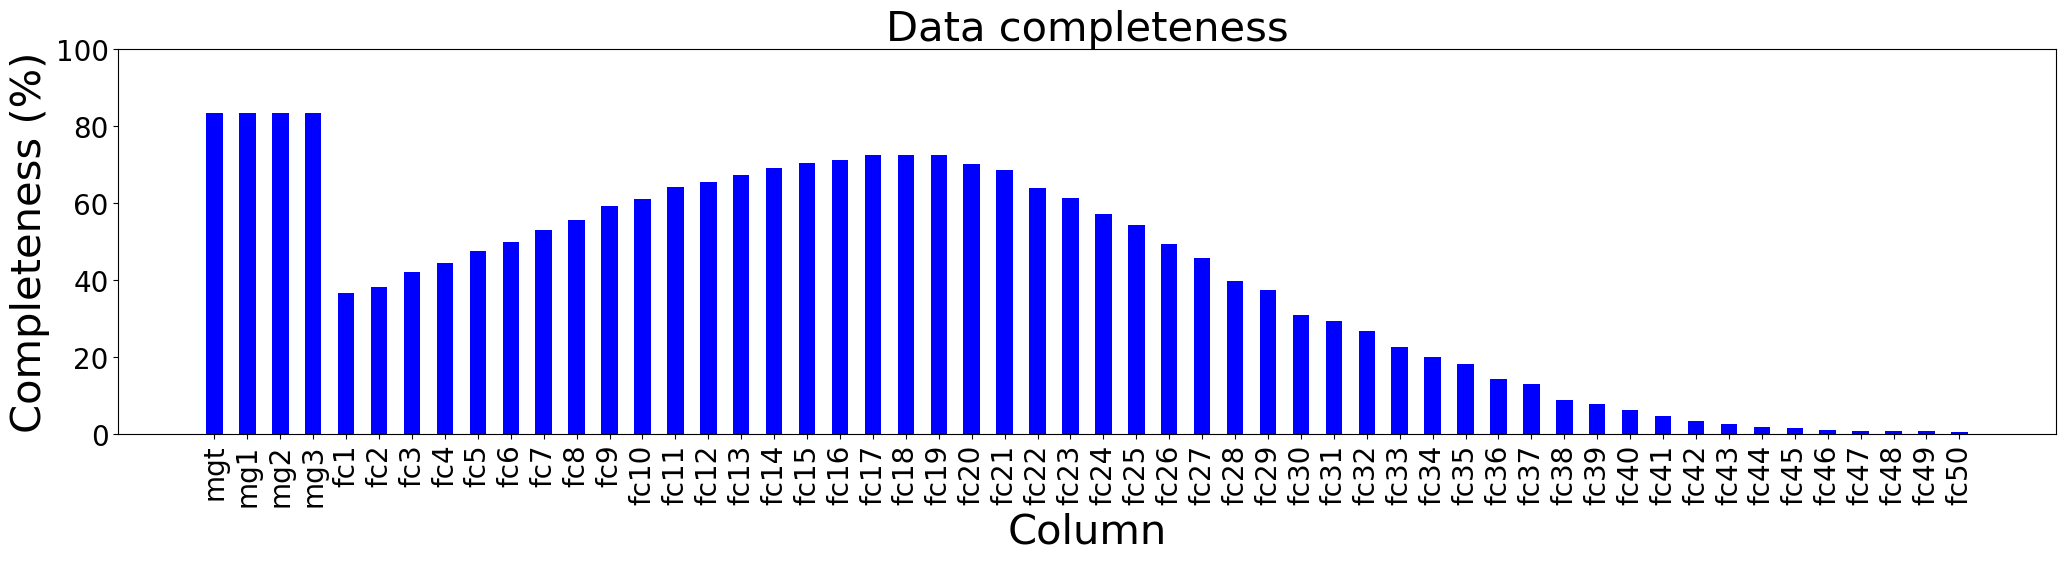

In [76]:
#print('Data completeness')
data_len = len(df)
compls = []
#n_feature = 70
#col_names = df.columns[:n_feature]
for col_name, col in df[dscovr_col_names].items():
    compls.append(col.notna().sum() / data_len * 100)
    #print(f'{col_name}: {col.notna().sum()/data_len*100:.1f}%')

#print(compls)
col_idxs = np.arange(len(dscovr_col_names))
plt.figure(figsize=(25, 5))
plt.title('Data completeness', fontsize=30)
plt.bar(col_idxs, compls, color='b', width=0.5)
plt.xlabel('Column', fontsize=30)
plt.ylabel('Completeness (%)', fontsize=30)
plt.xticks(ticks=col_idxs, labels=dscovr_col_names, fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.ylim(0, 100)
plt.show()

# Data distribution

/var/folders/04/cfx7ndhj6190hh3bkr29_c440000gn/T/ipykernel_4993/2921221023.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Column name', y='Standardized value', data=std_df, palette='Spectral')


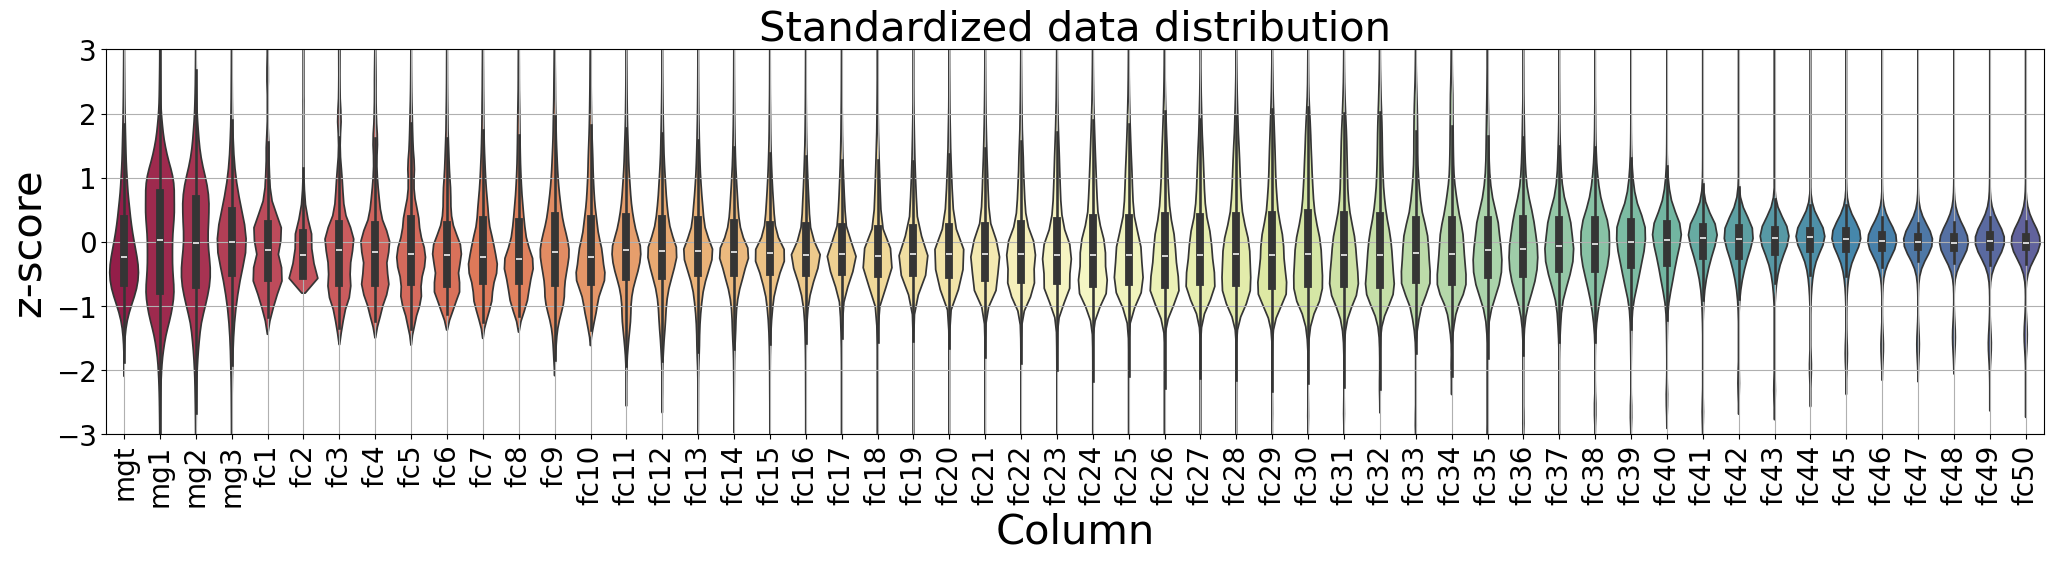

In [77]:
step = 1
std_df = df[dscovr_col_names].resample(rule='1h').mean()
std_df = (std_df - std_df.mean())/std_df.std()
std_df = std_df.melt(var_name='Column name', value_name='Standardized value')
plt.figure(figsize=(25, 5))
plt.title('Standardized data distribution', fontsize=30)
sns.violinplot(x='Column name', y='Standardized value', data=std_df, palette='Spectral')
plt.yticks(fontsize=20)
plt.xticks(dscovr_col_names, rotation=90, fontsize=20)
plt.ylabel('z-score', fontsize=30)
plt.xlabel('Column', fontsize=30)
plt.ylim(-3, 3)
plt.grid()
plt.show()

# FFT

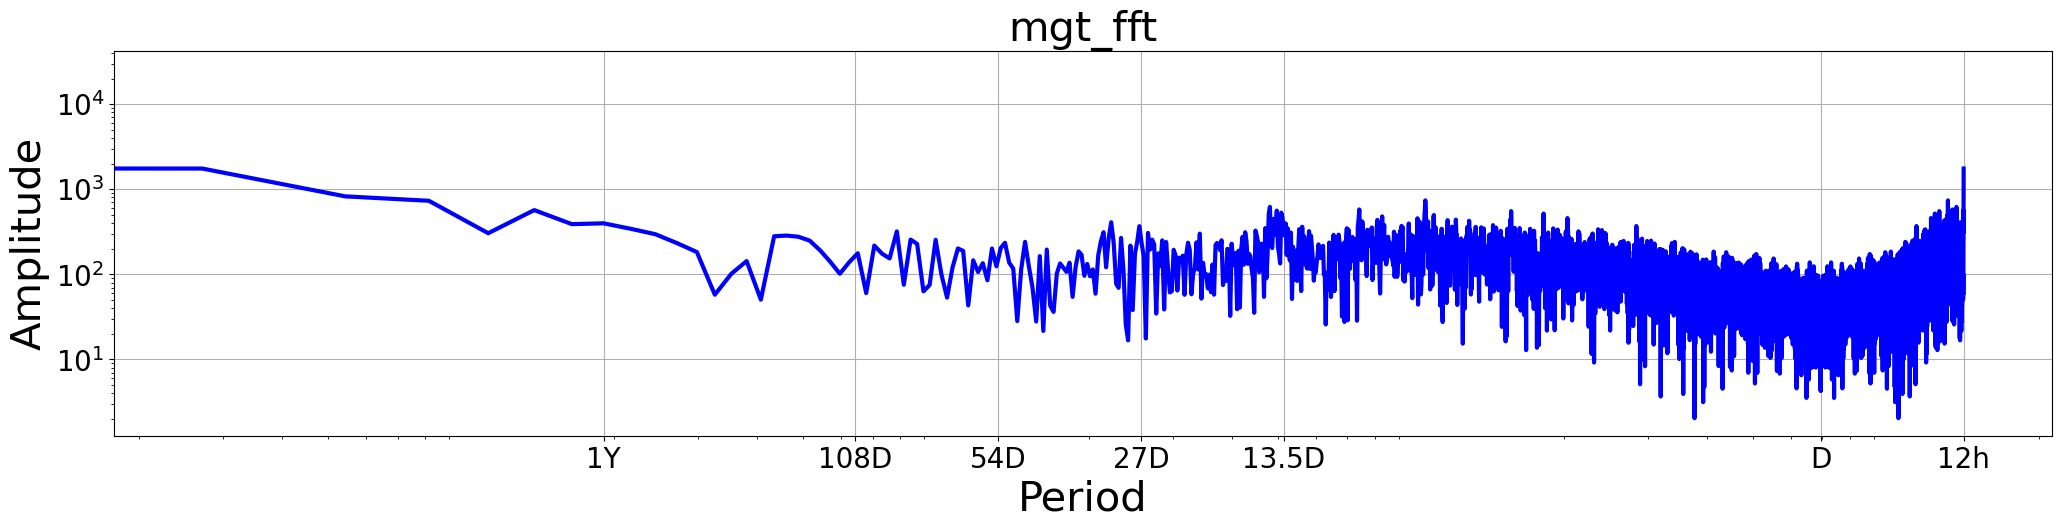

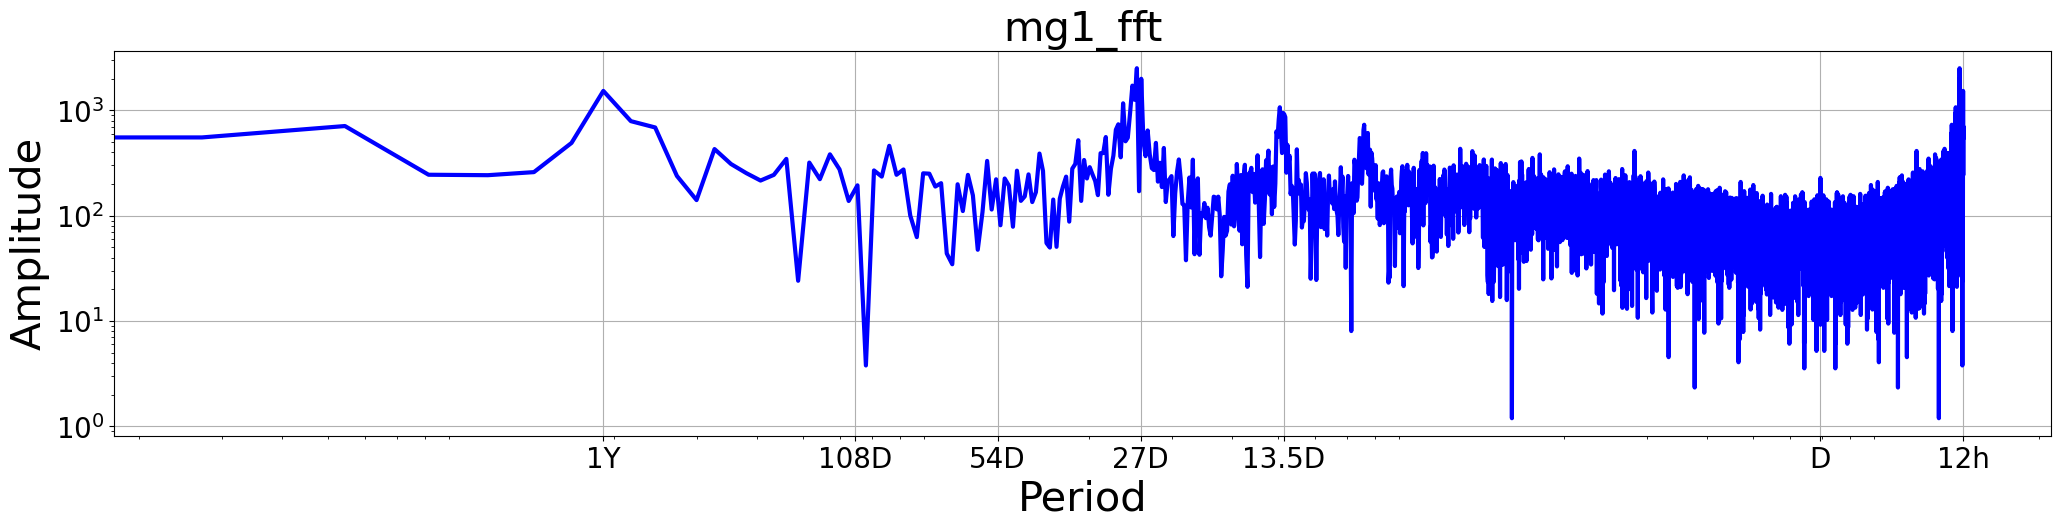

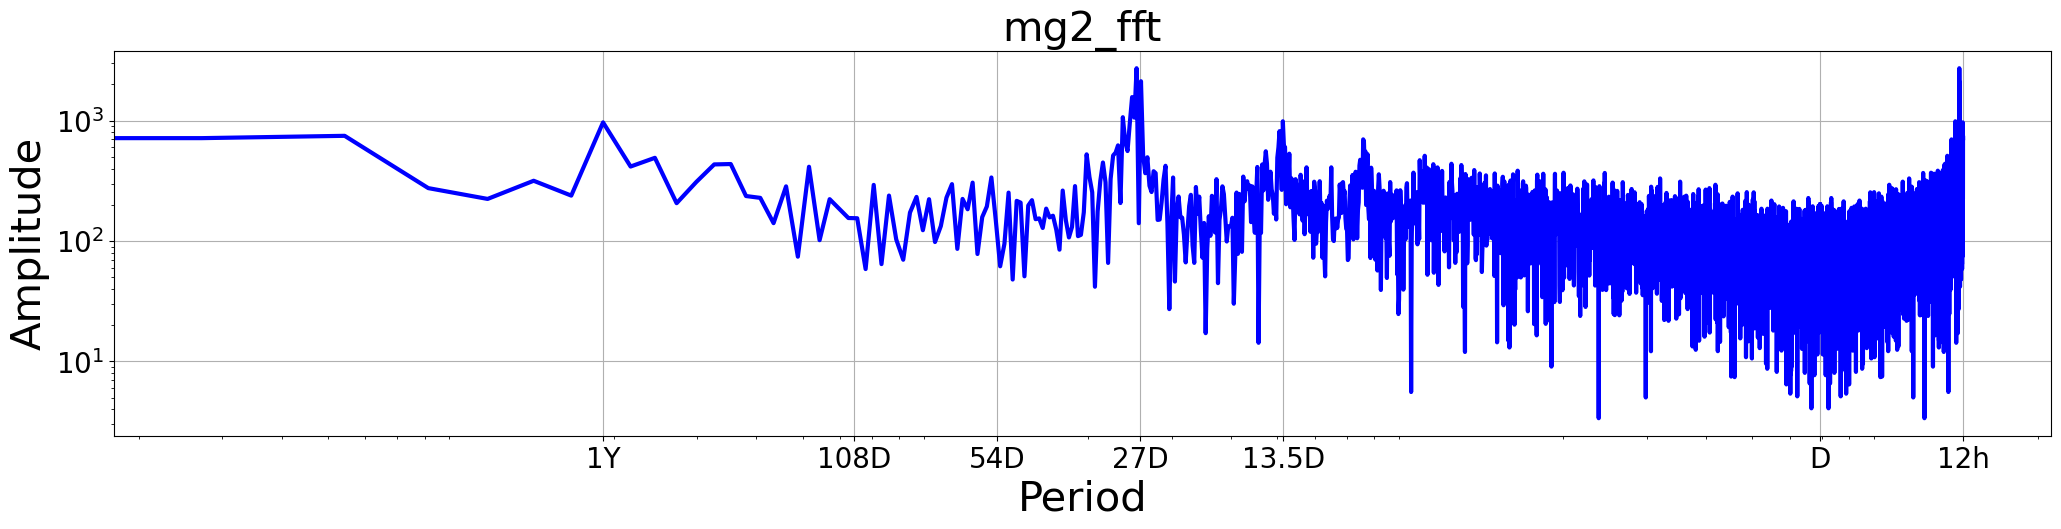

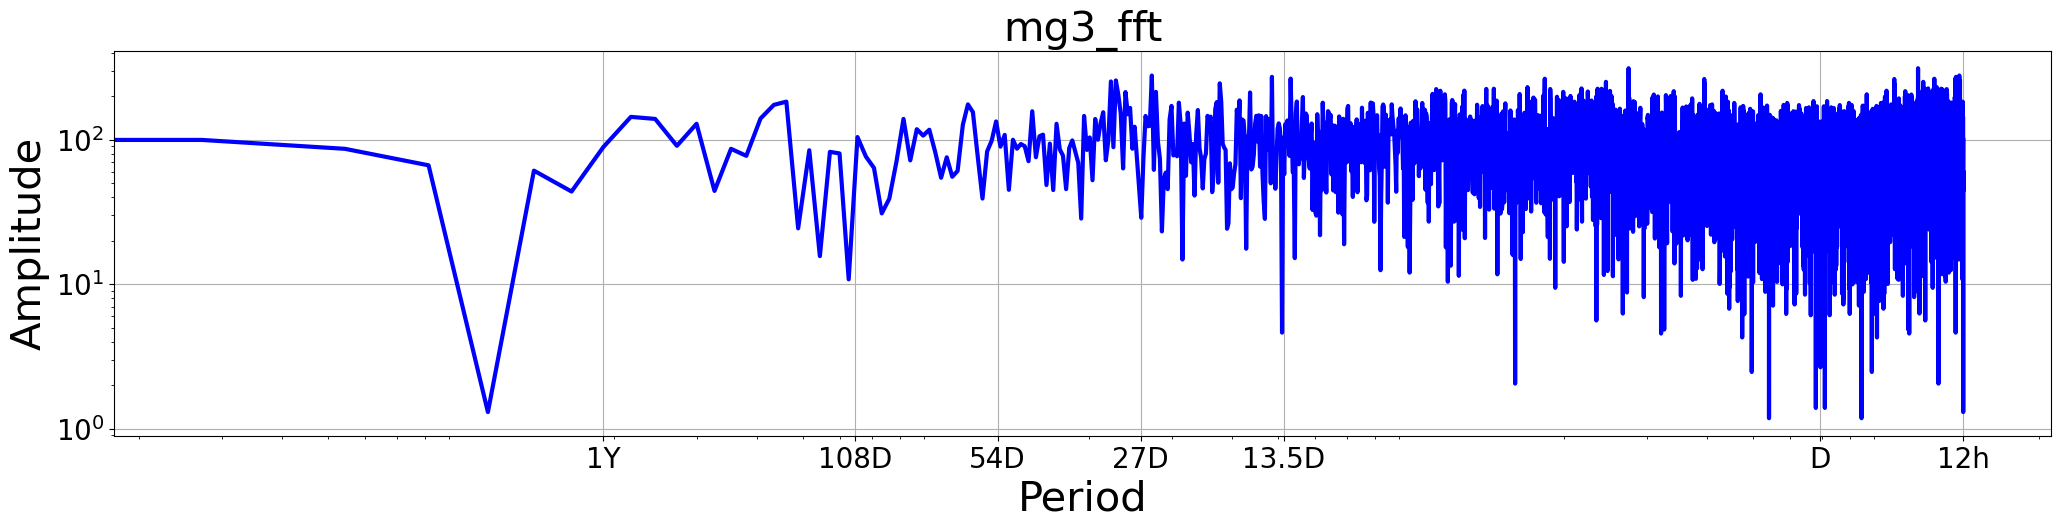

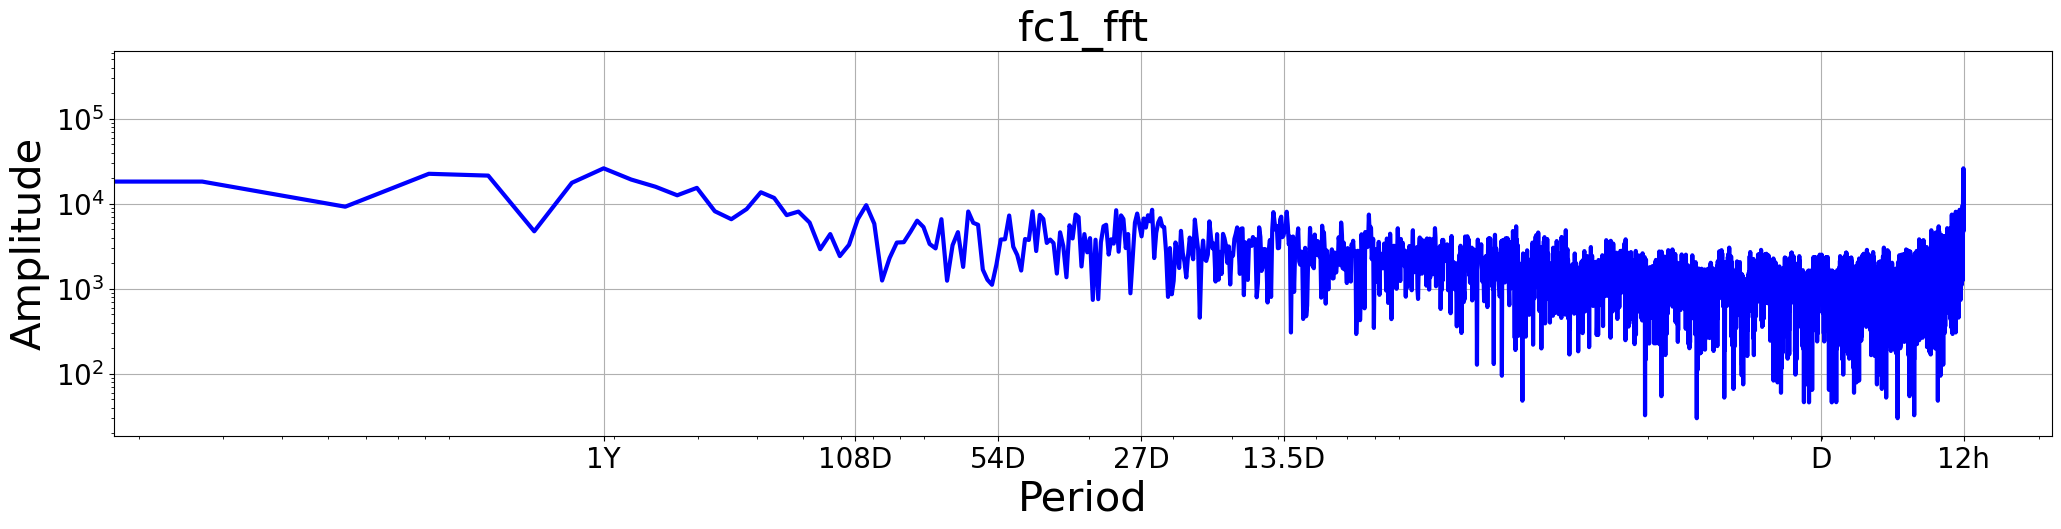

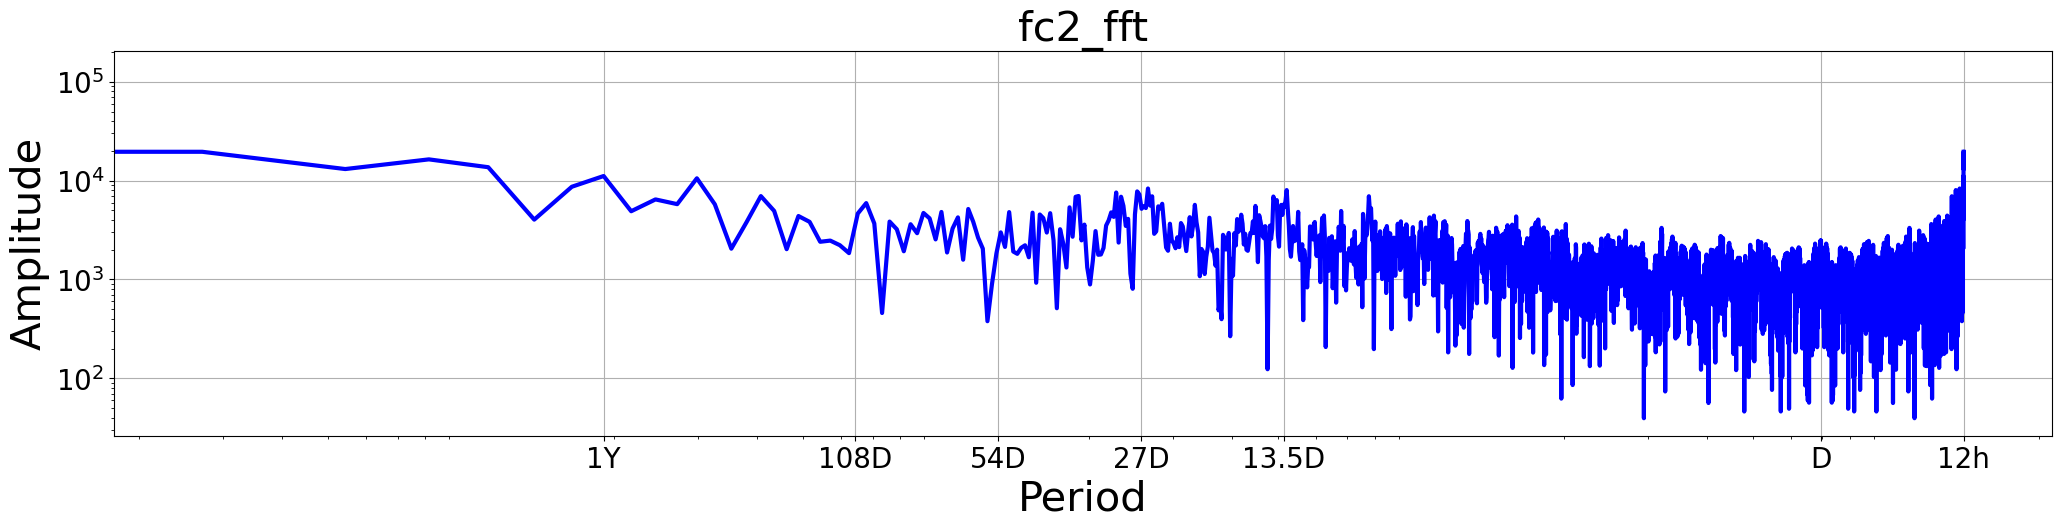

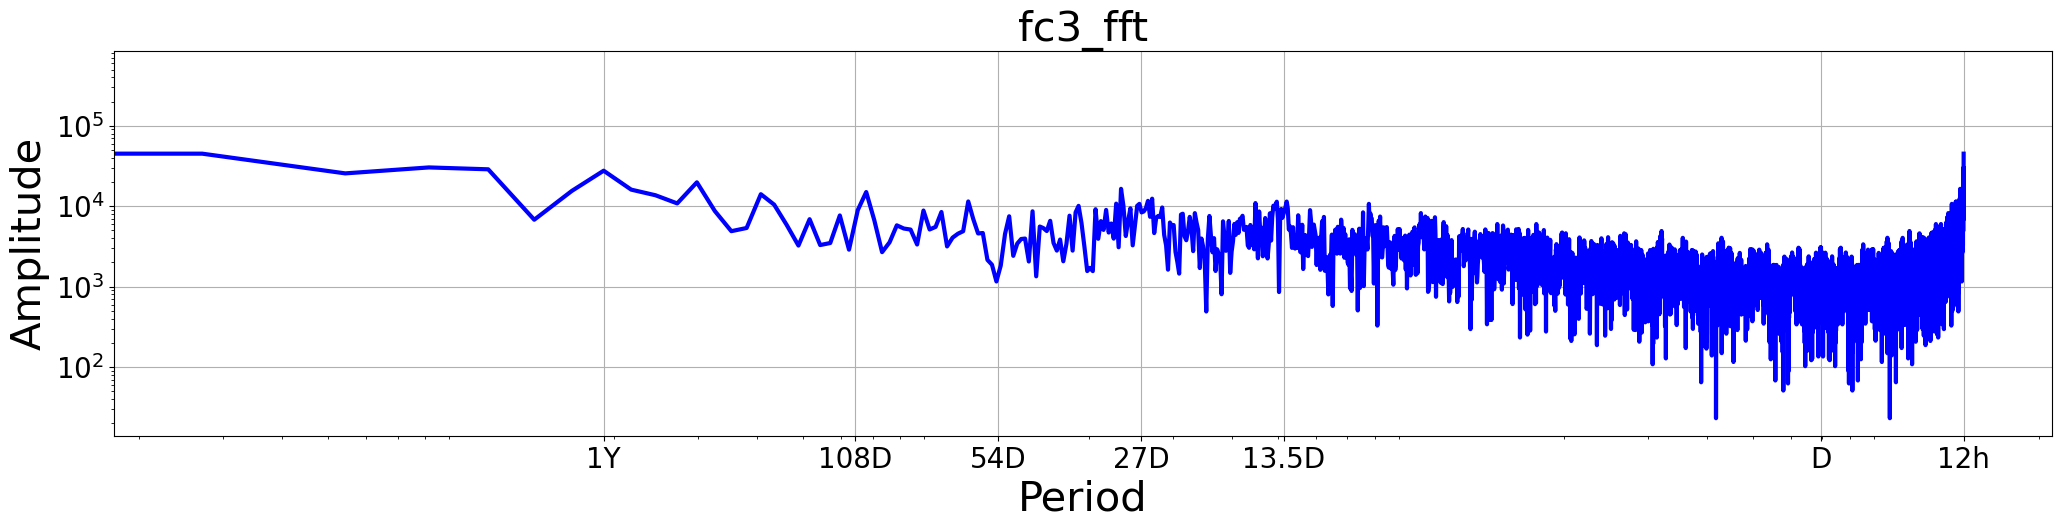

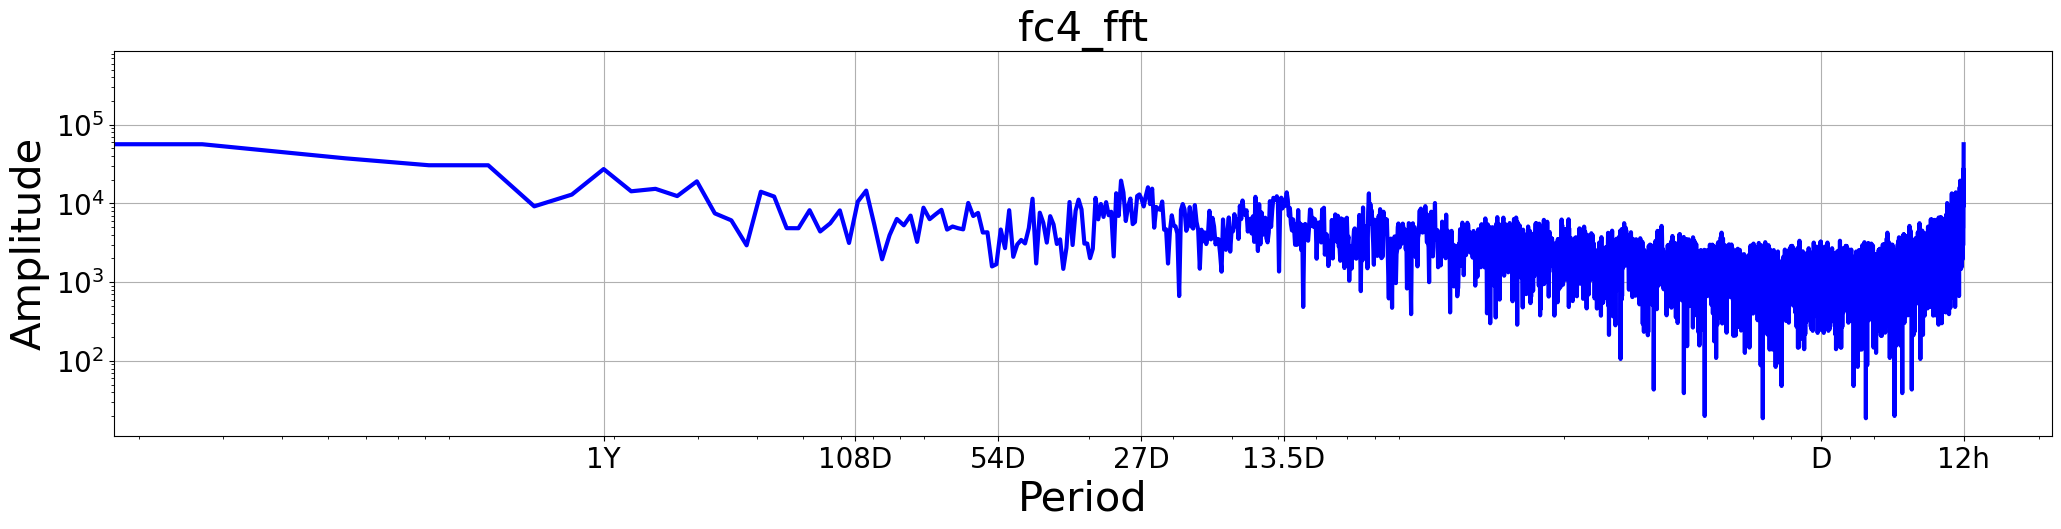

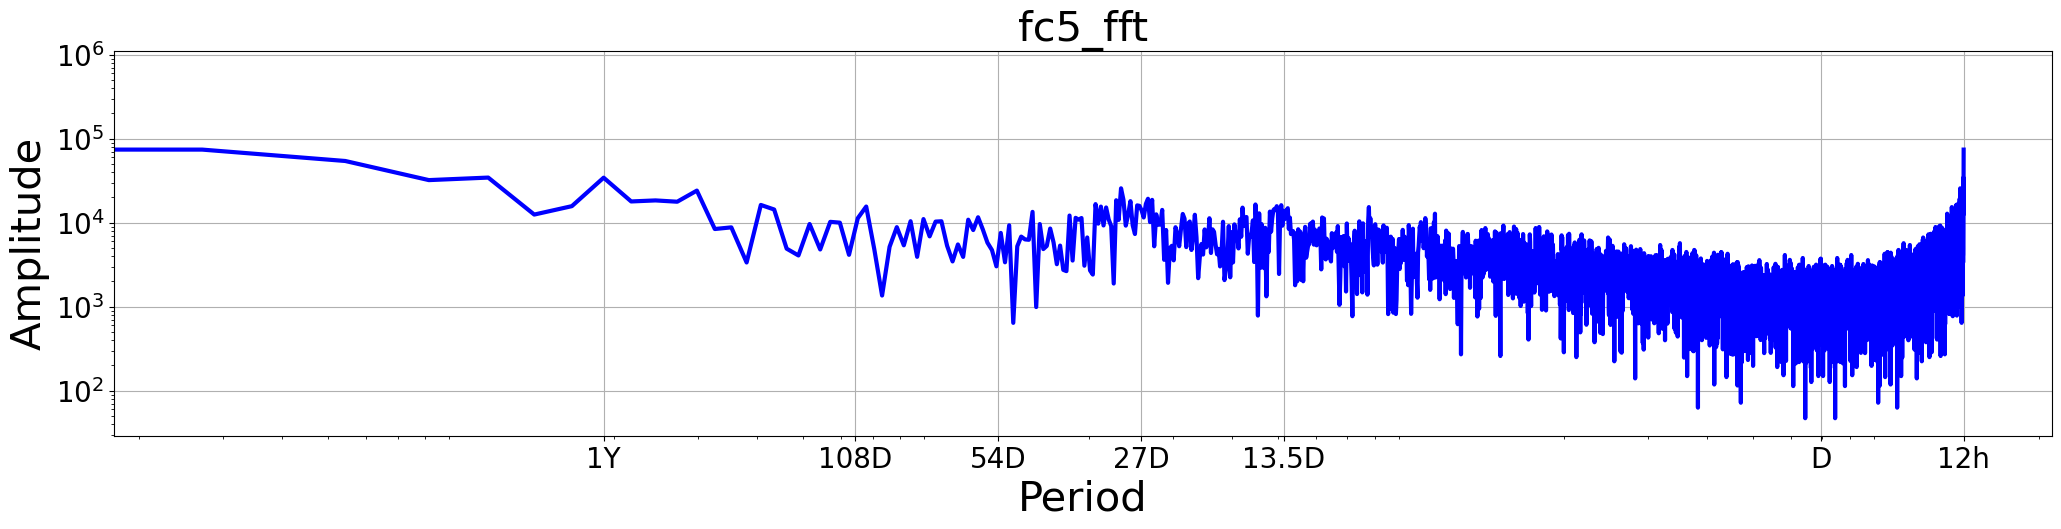

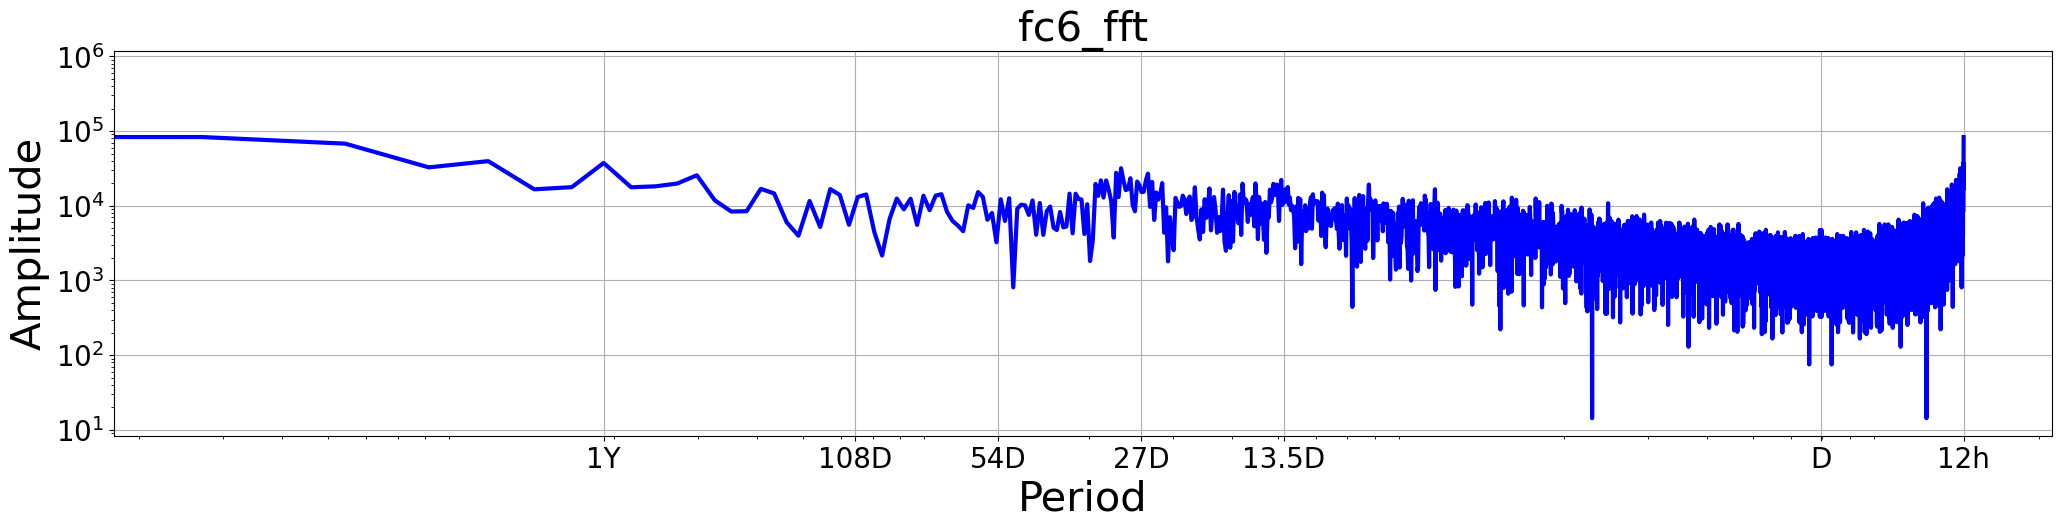

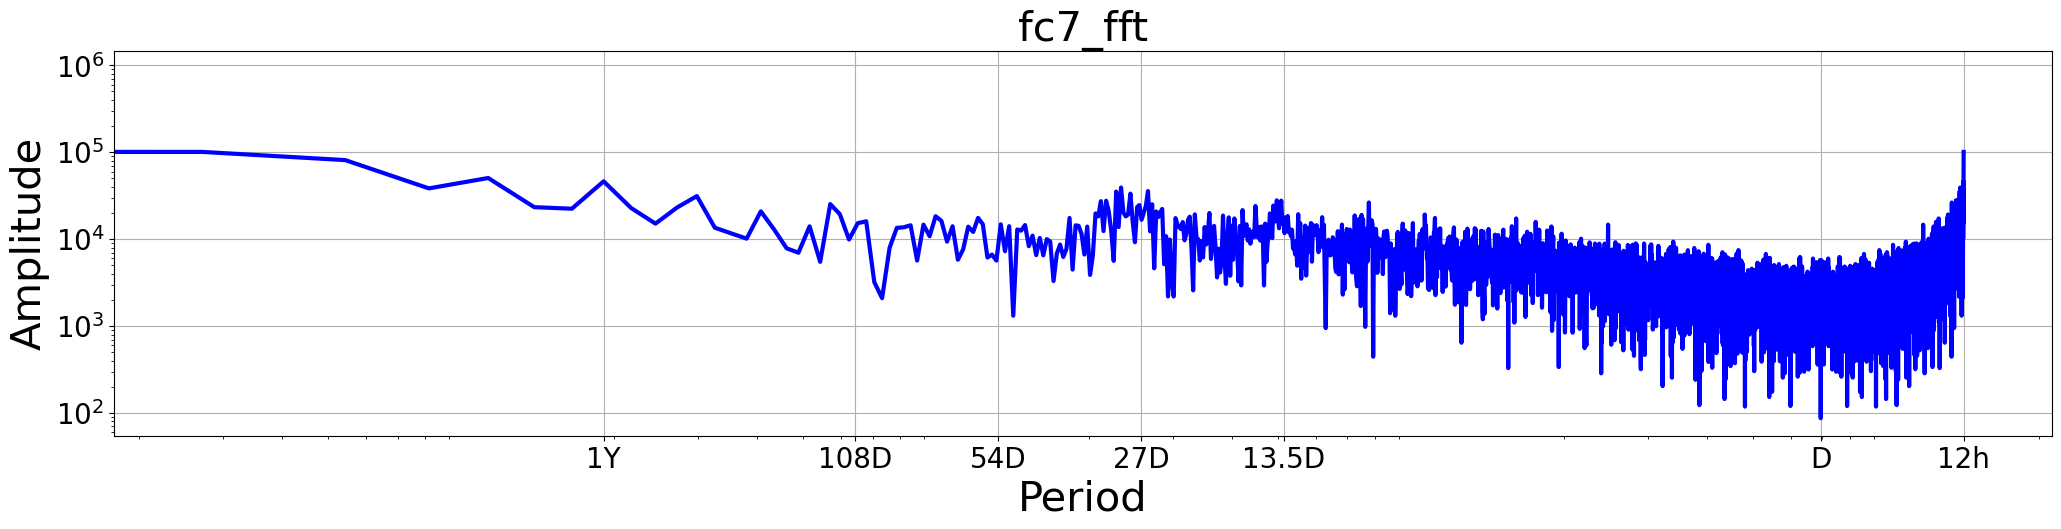

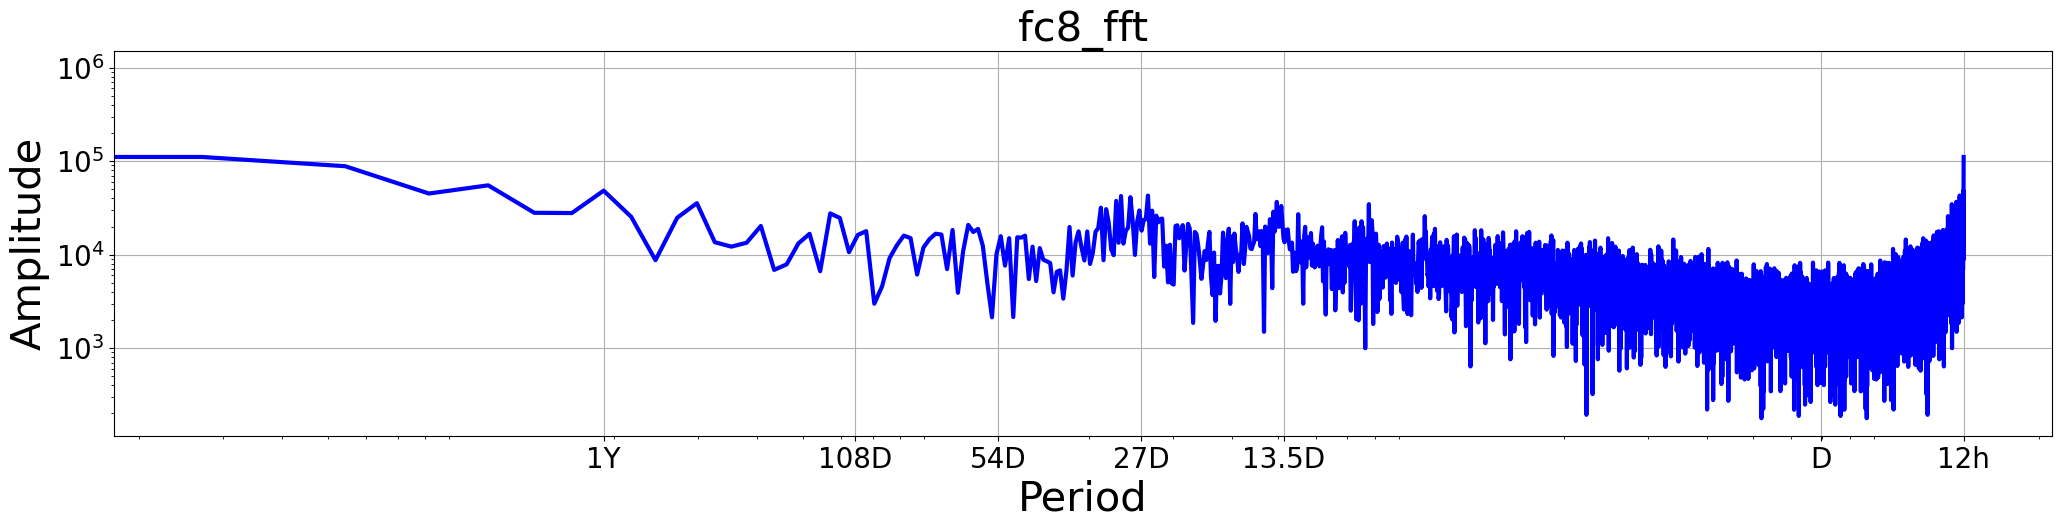

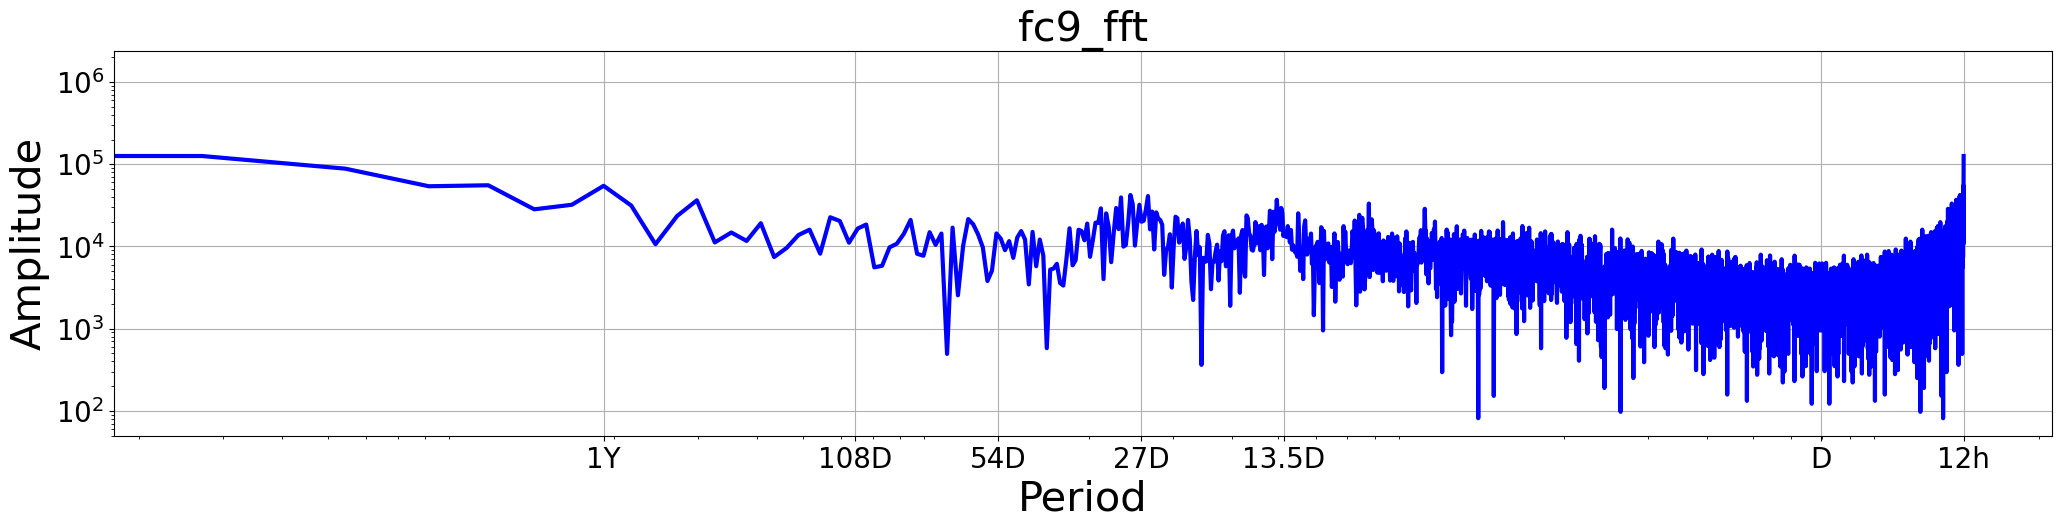

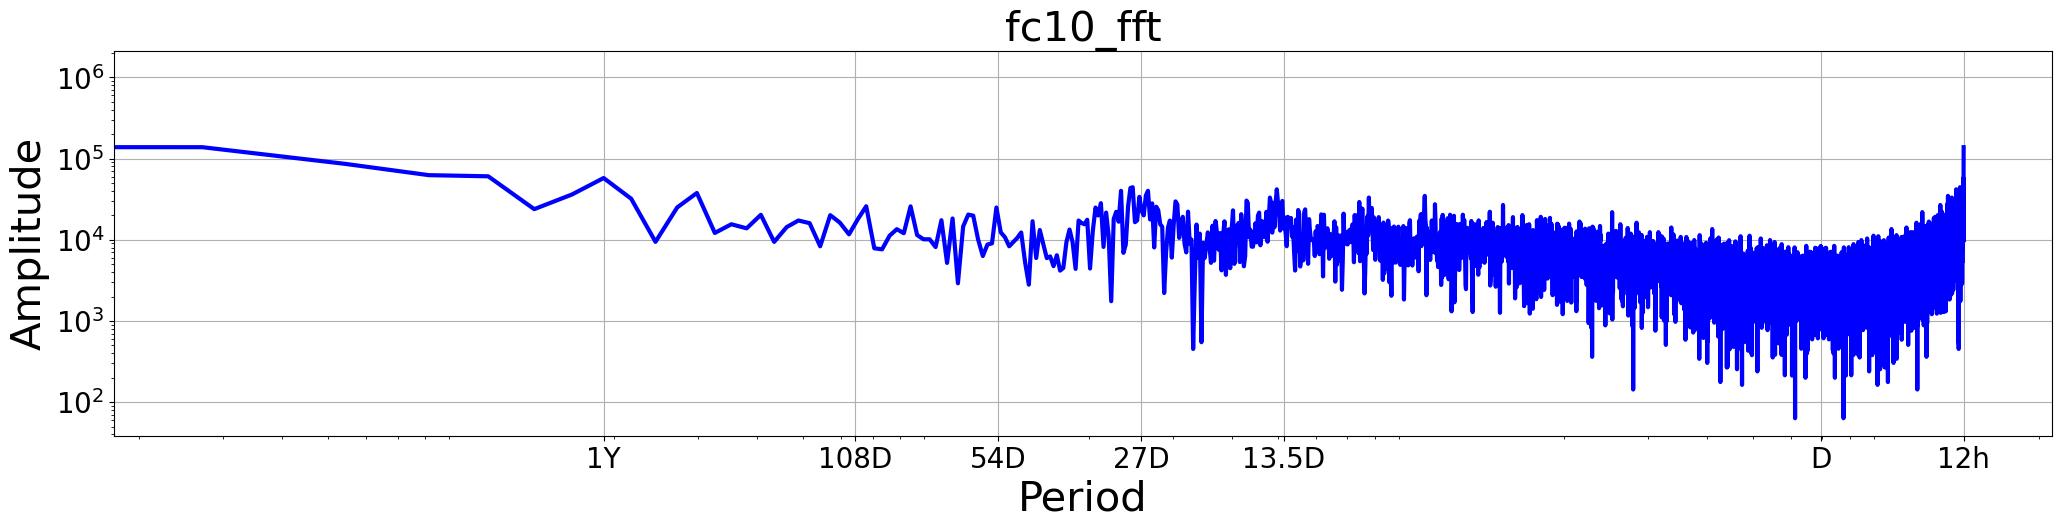

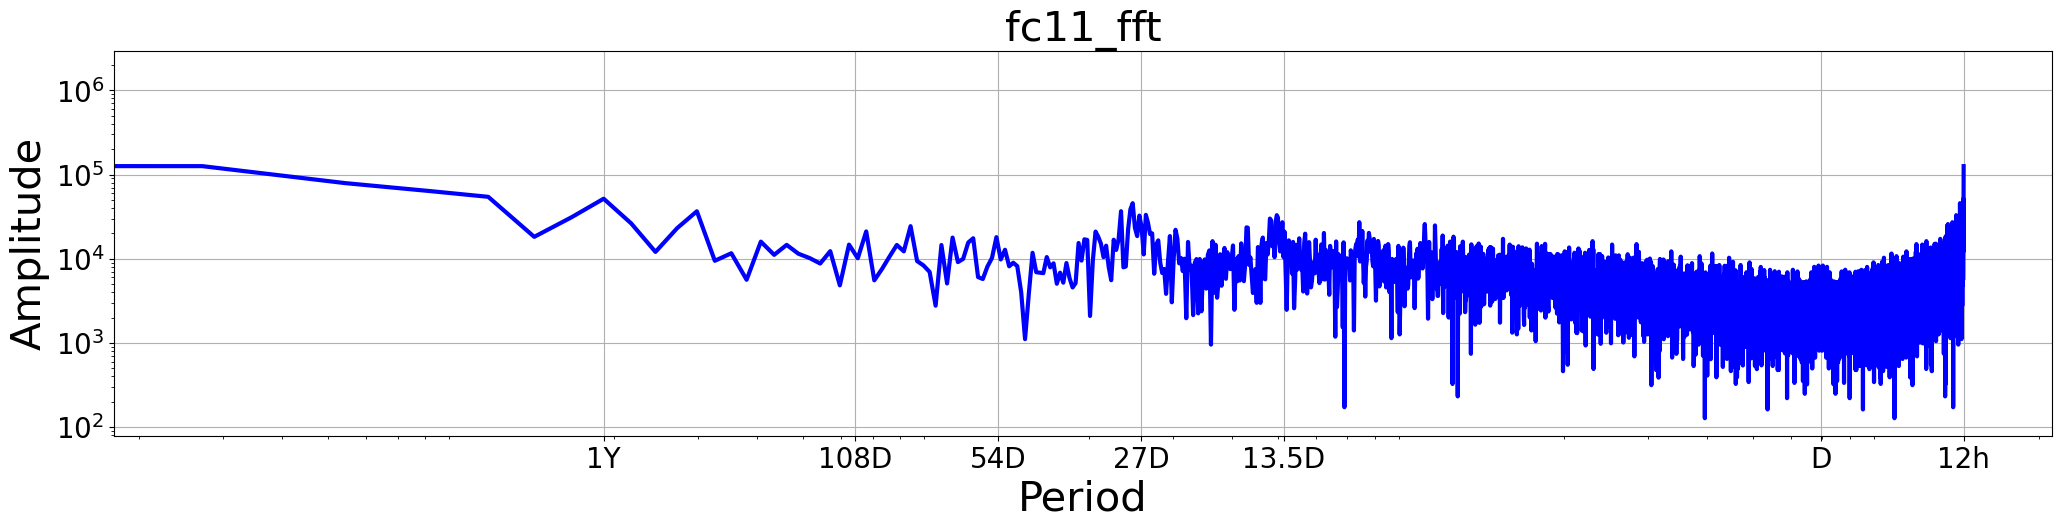

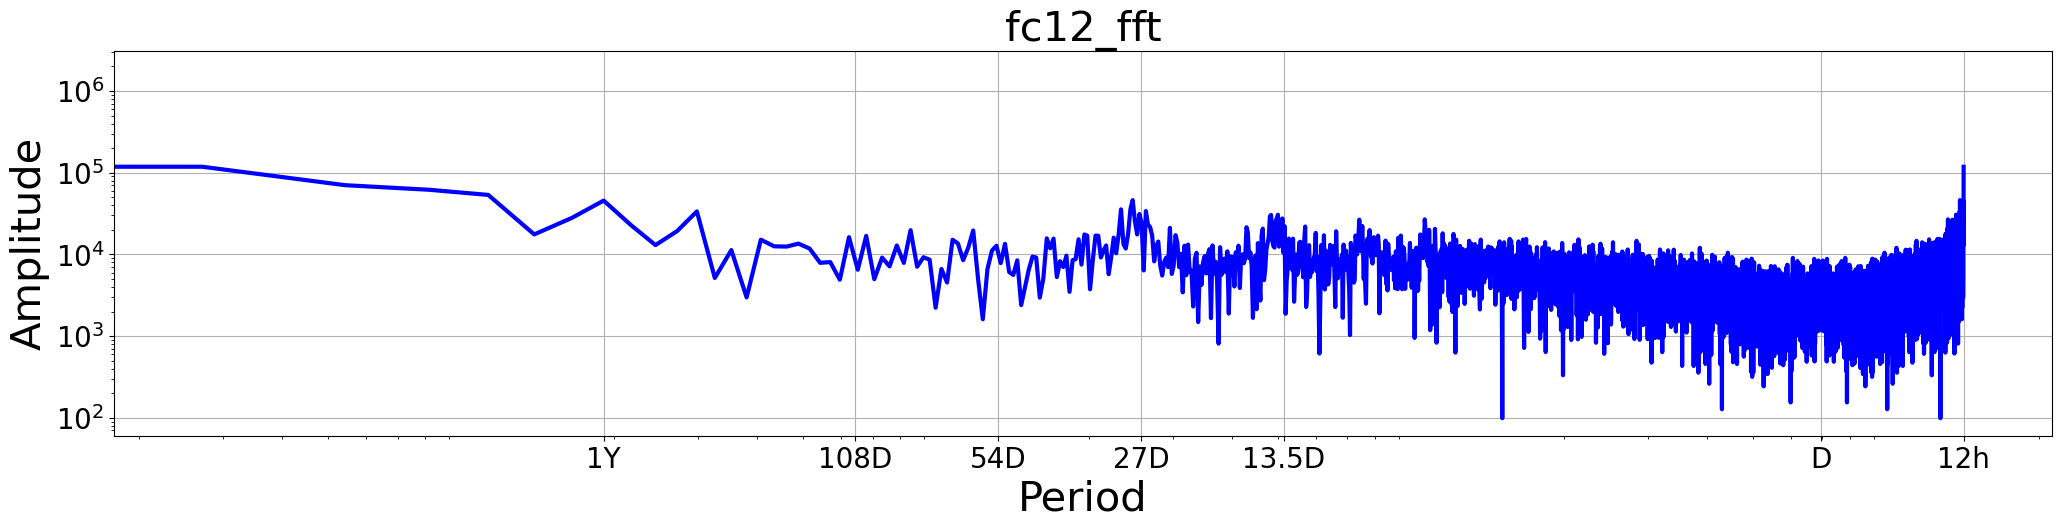

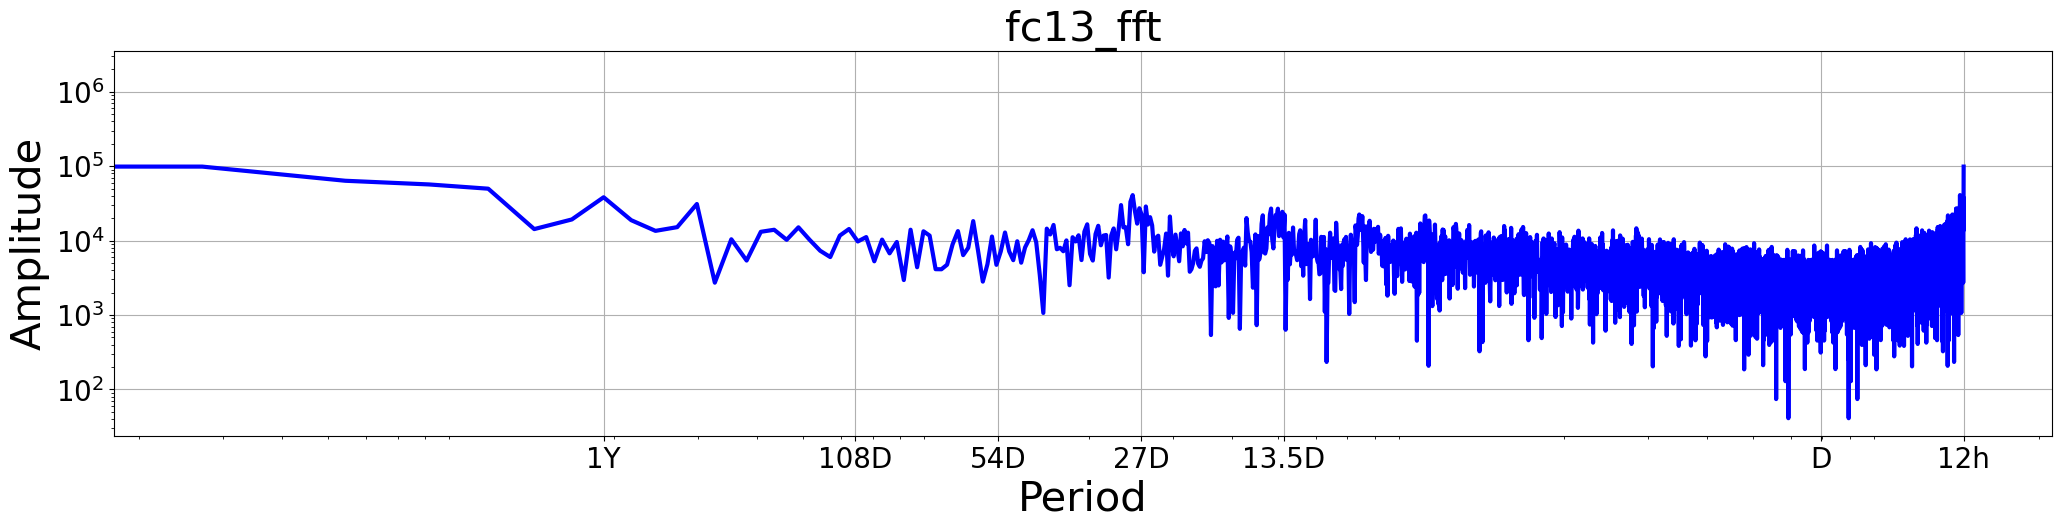

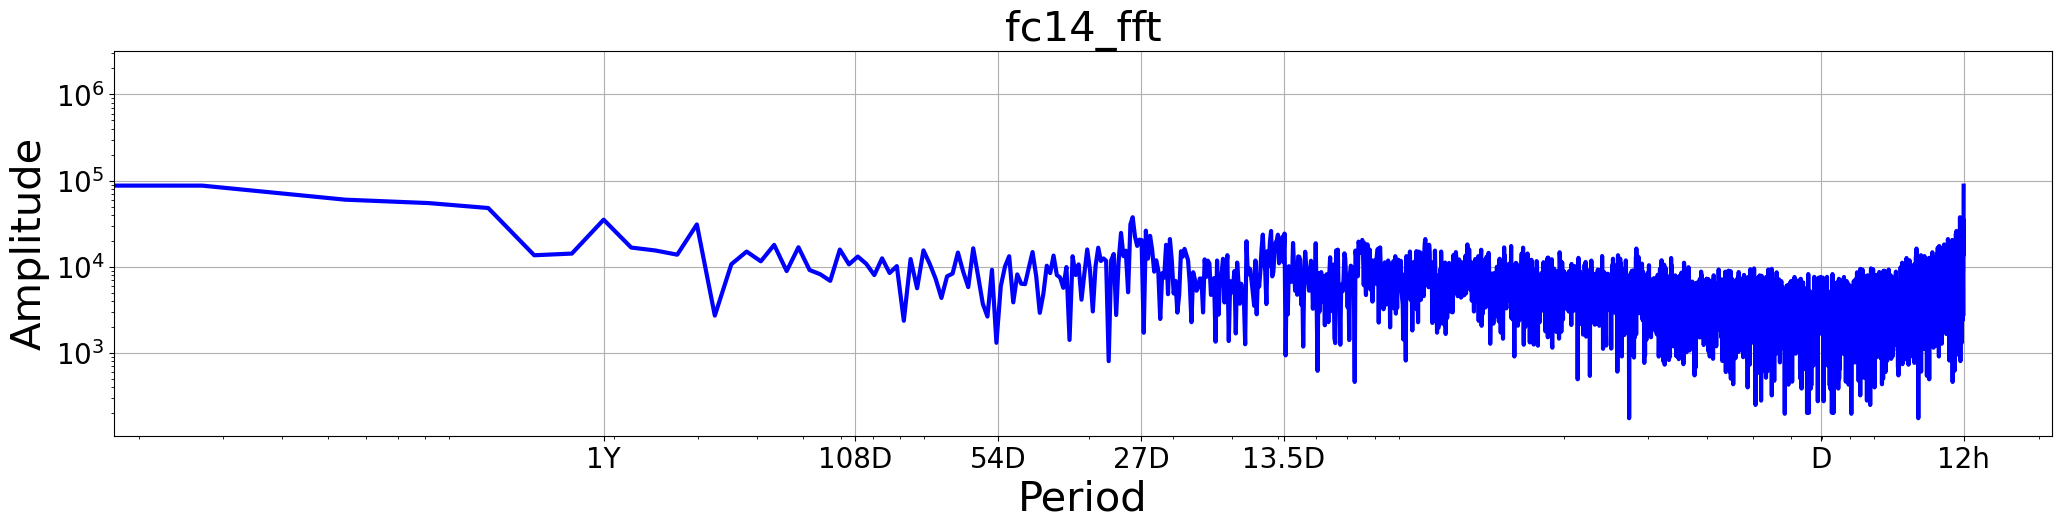

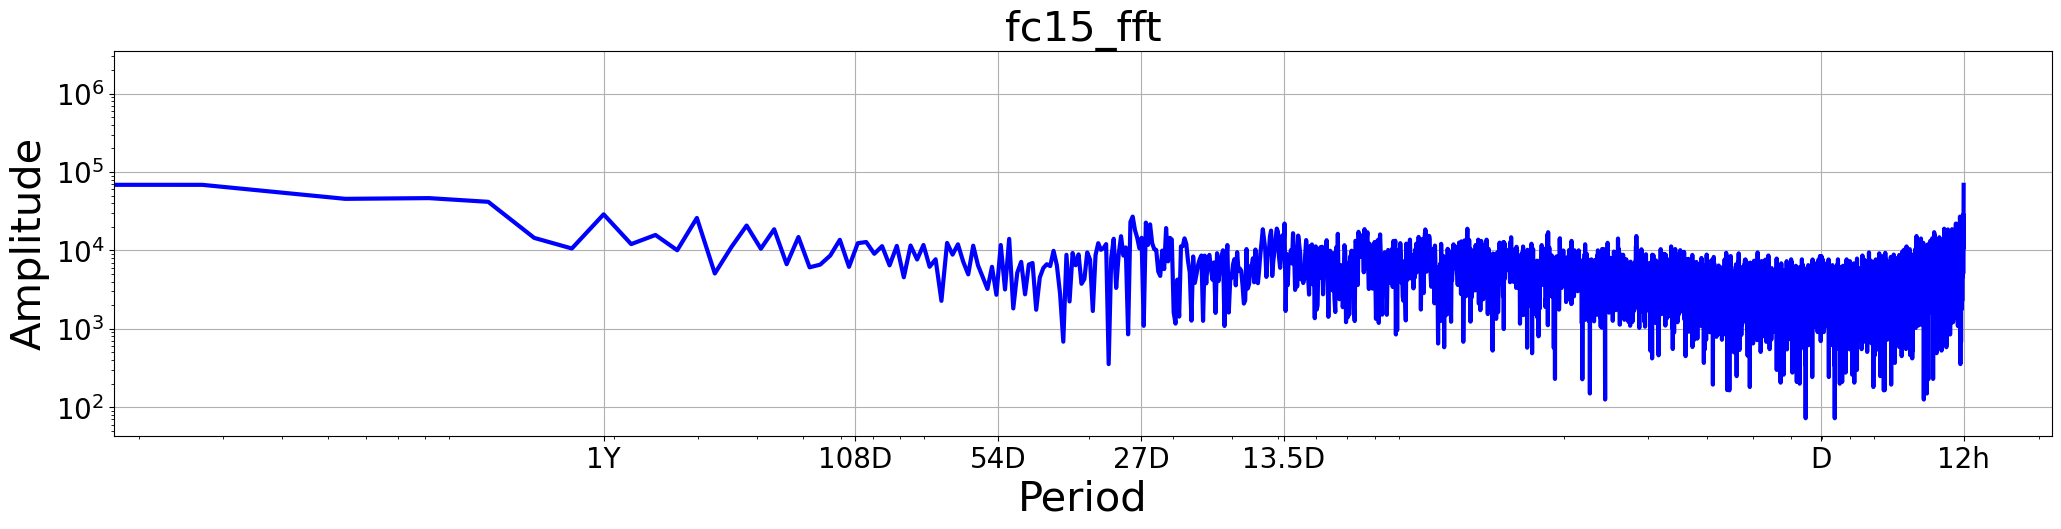

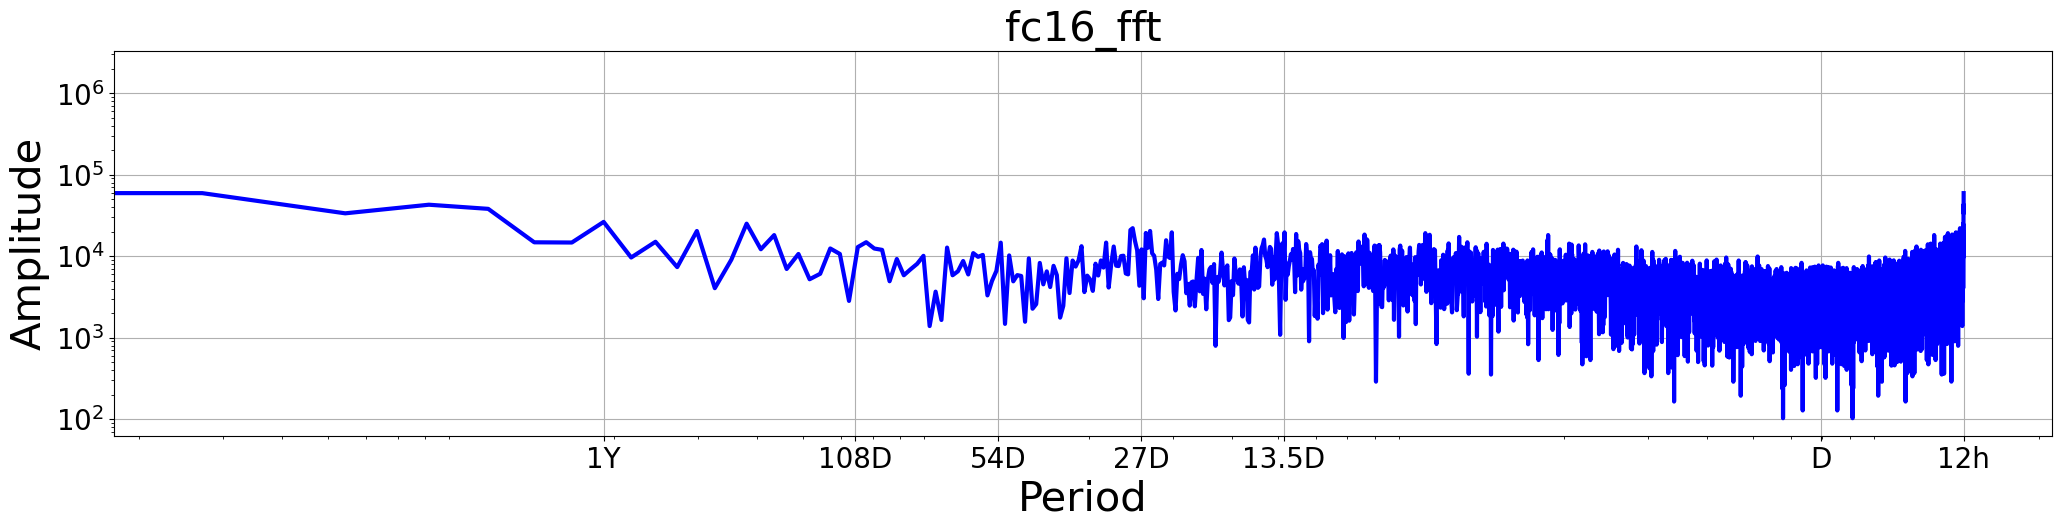

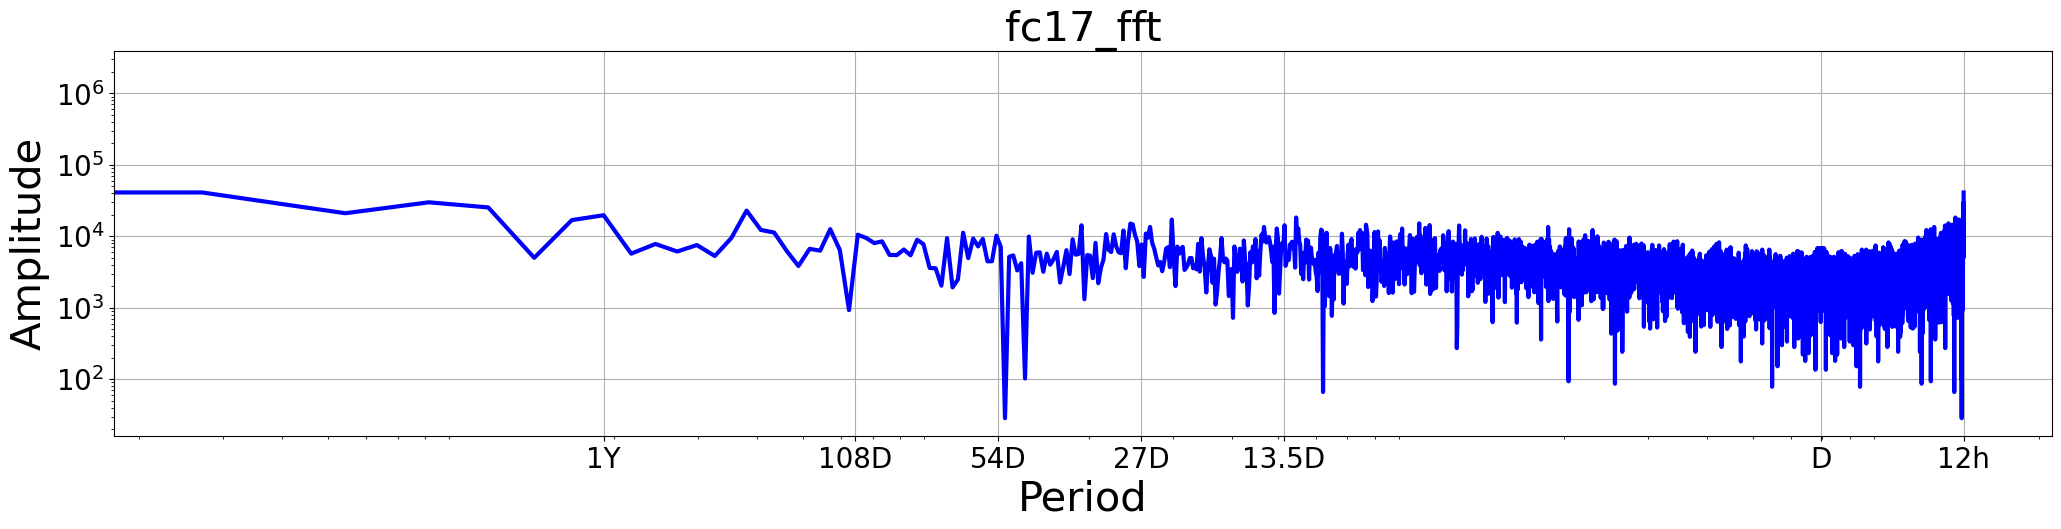

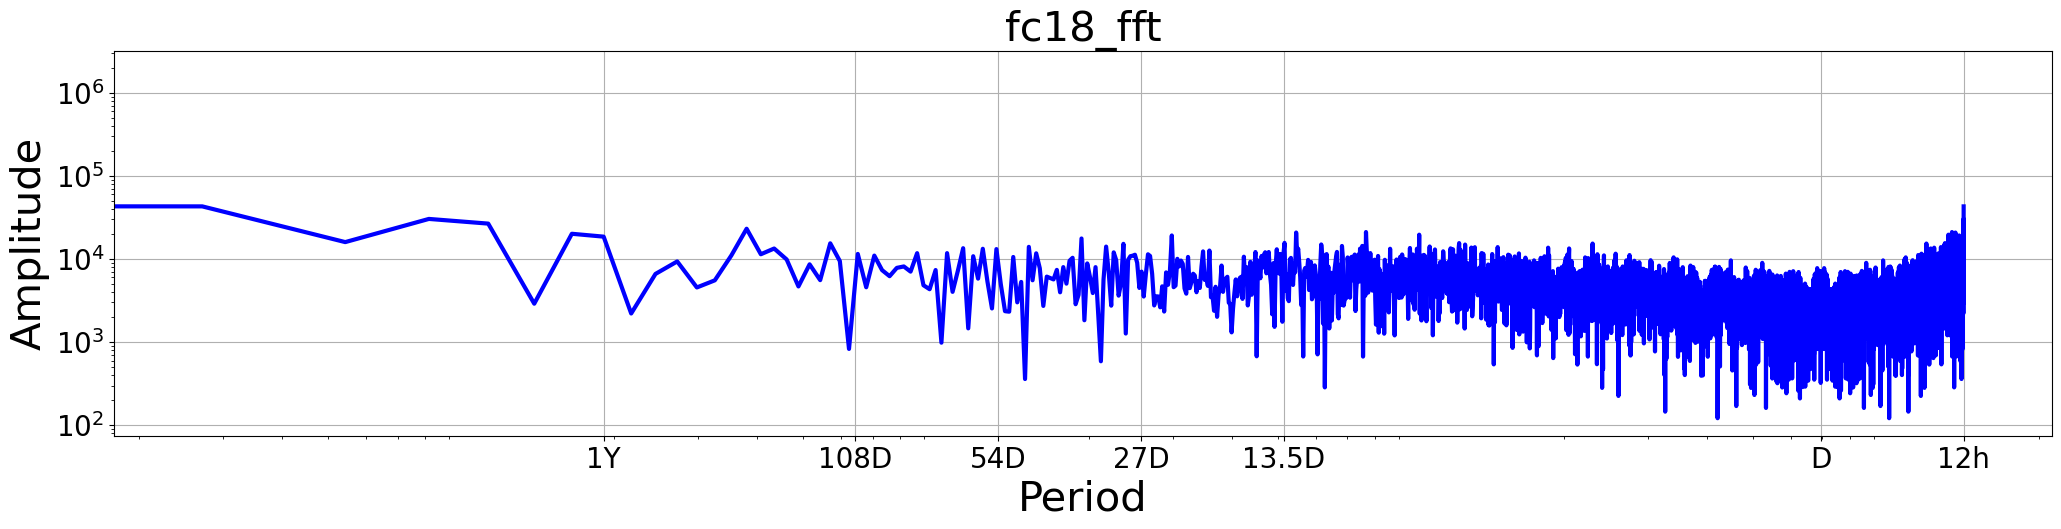

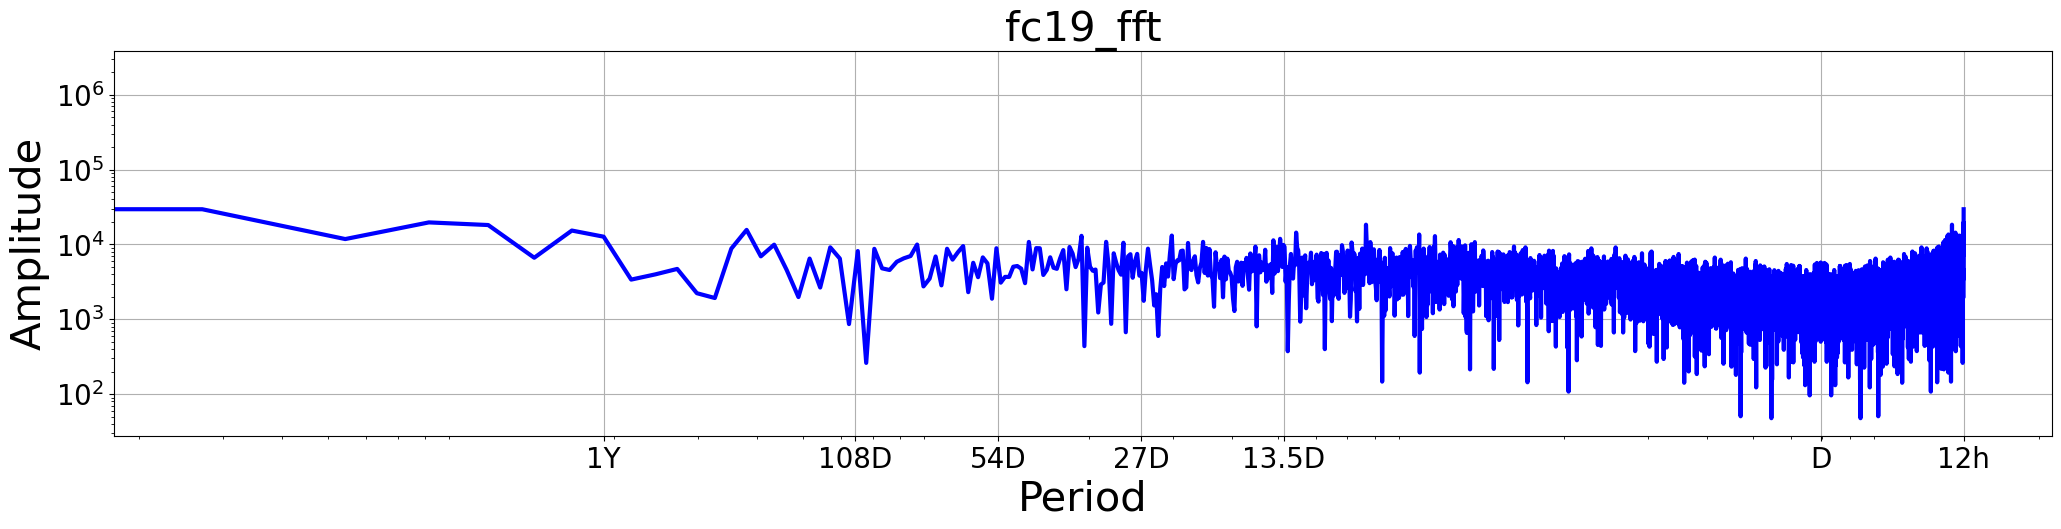

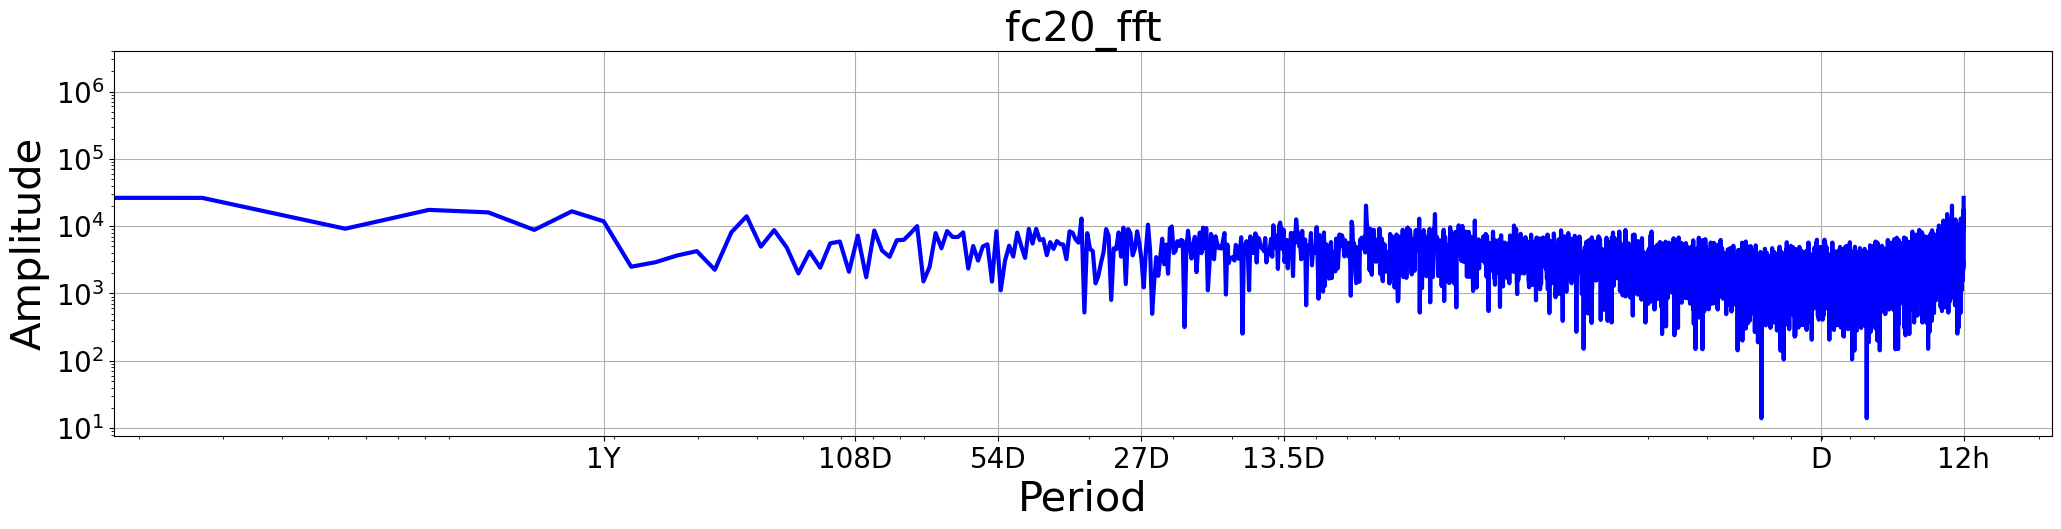

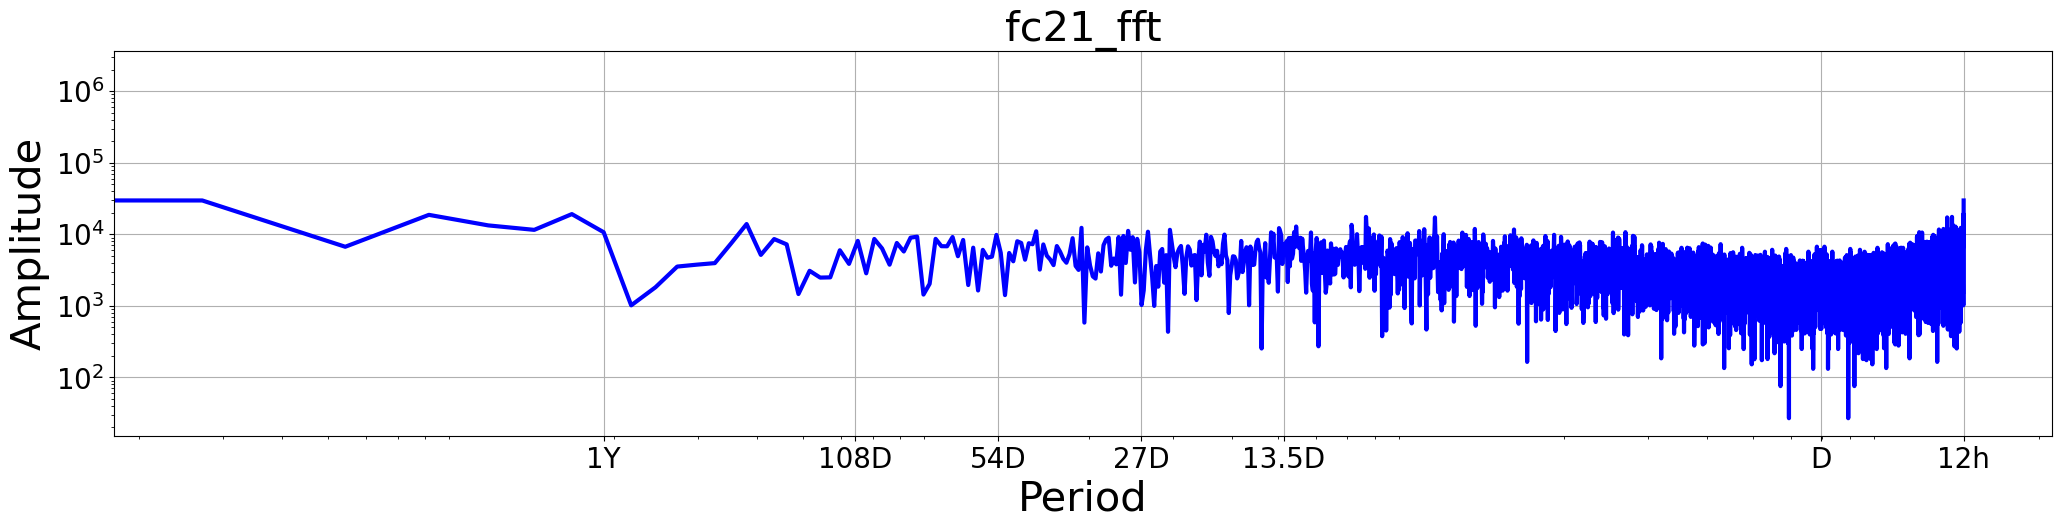

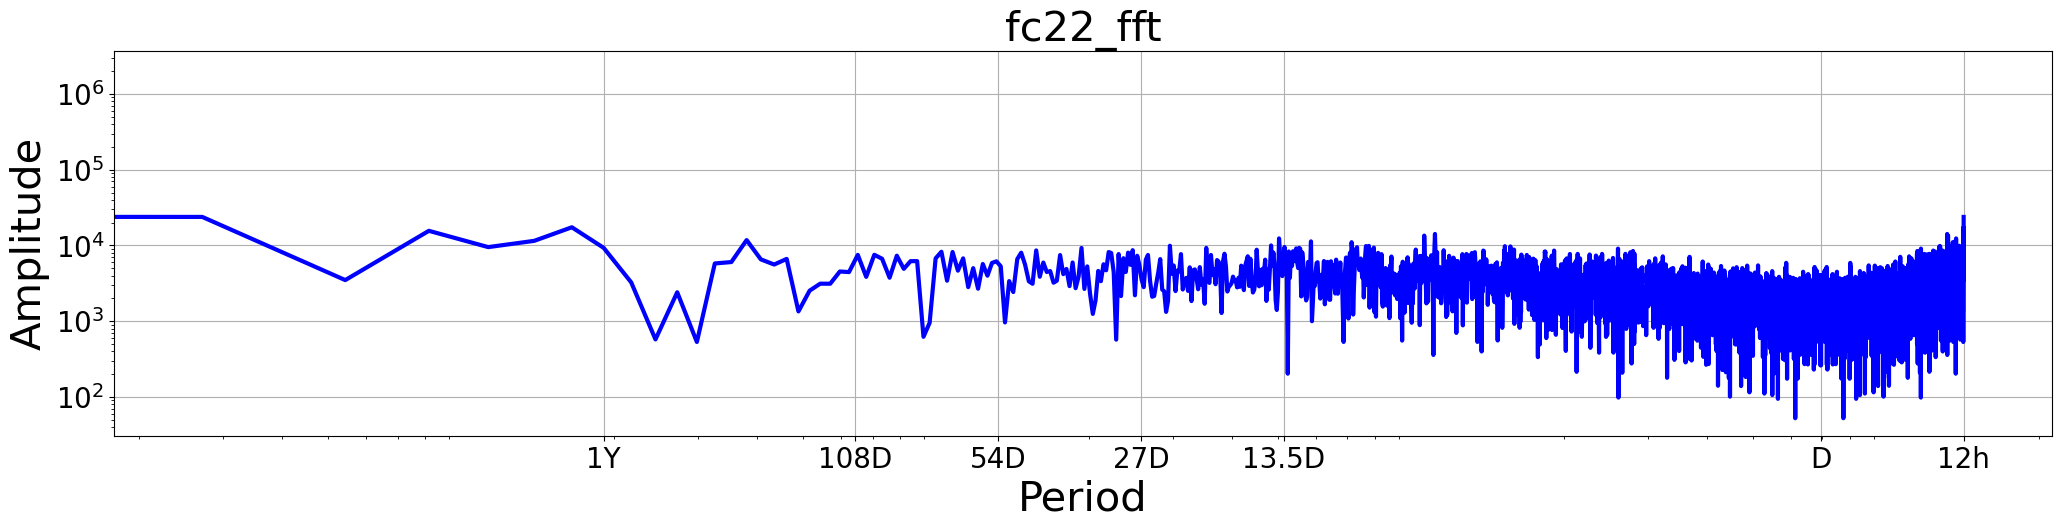

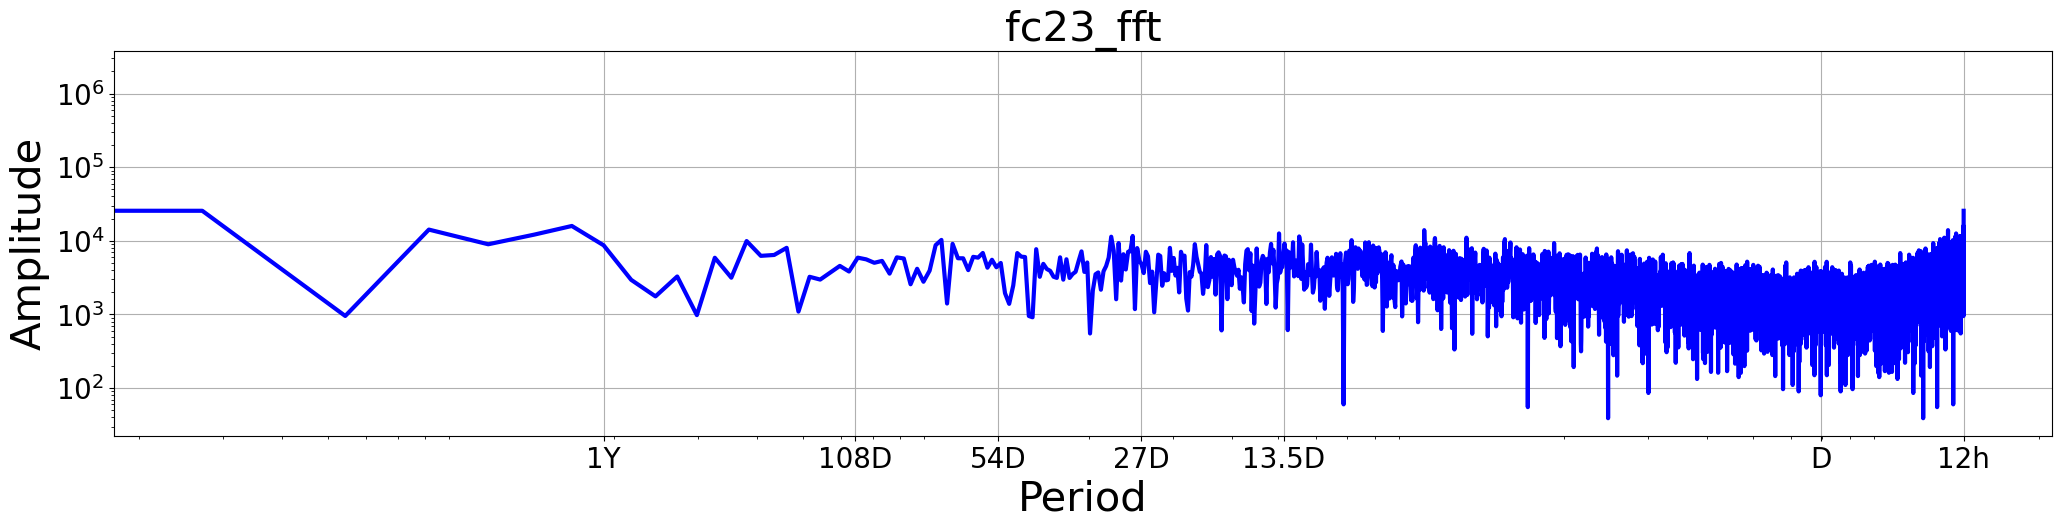

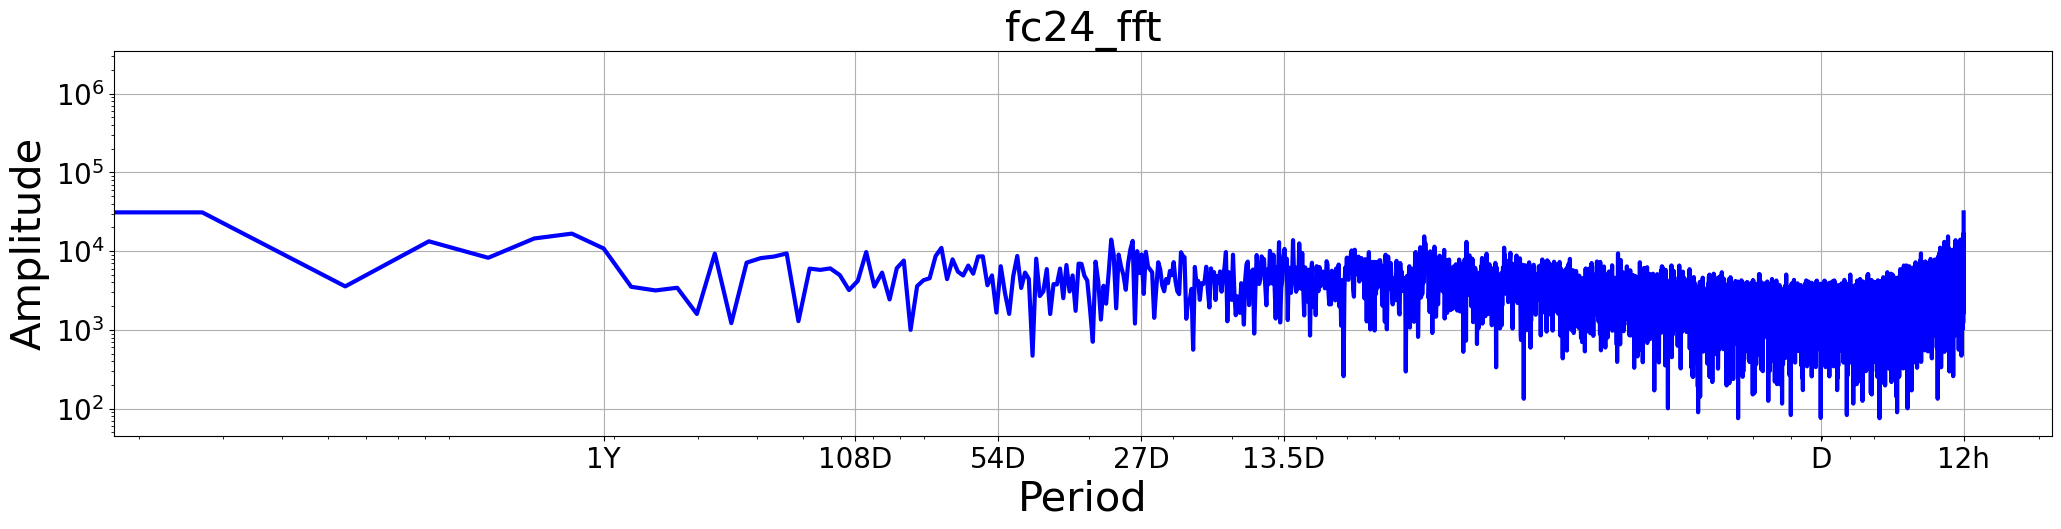

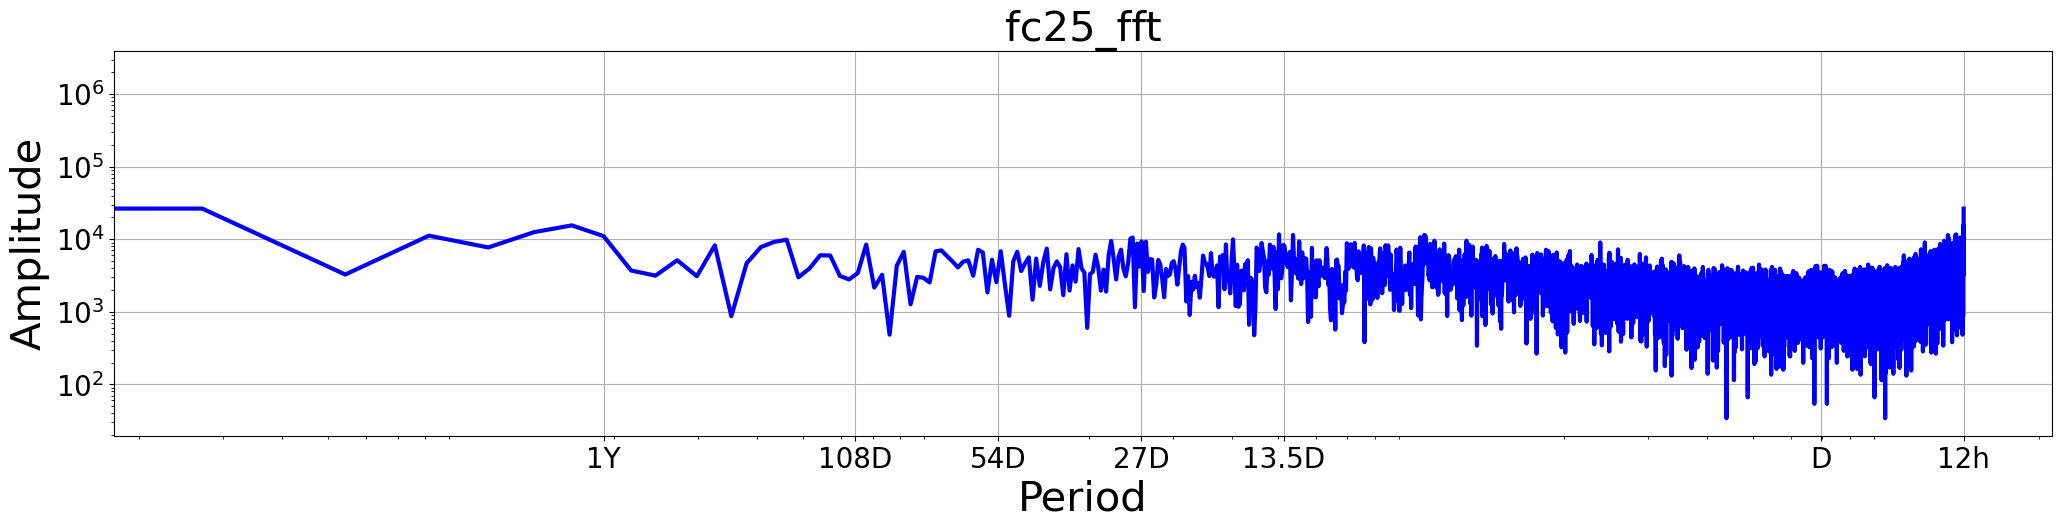

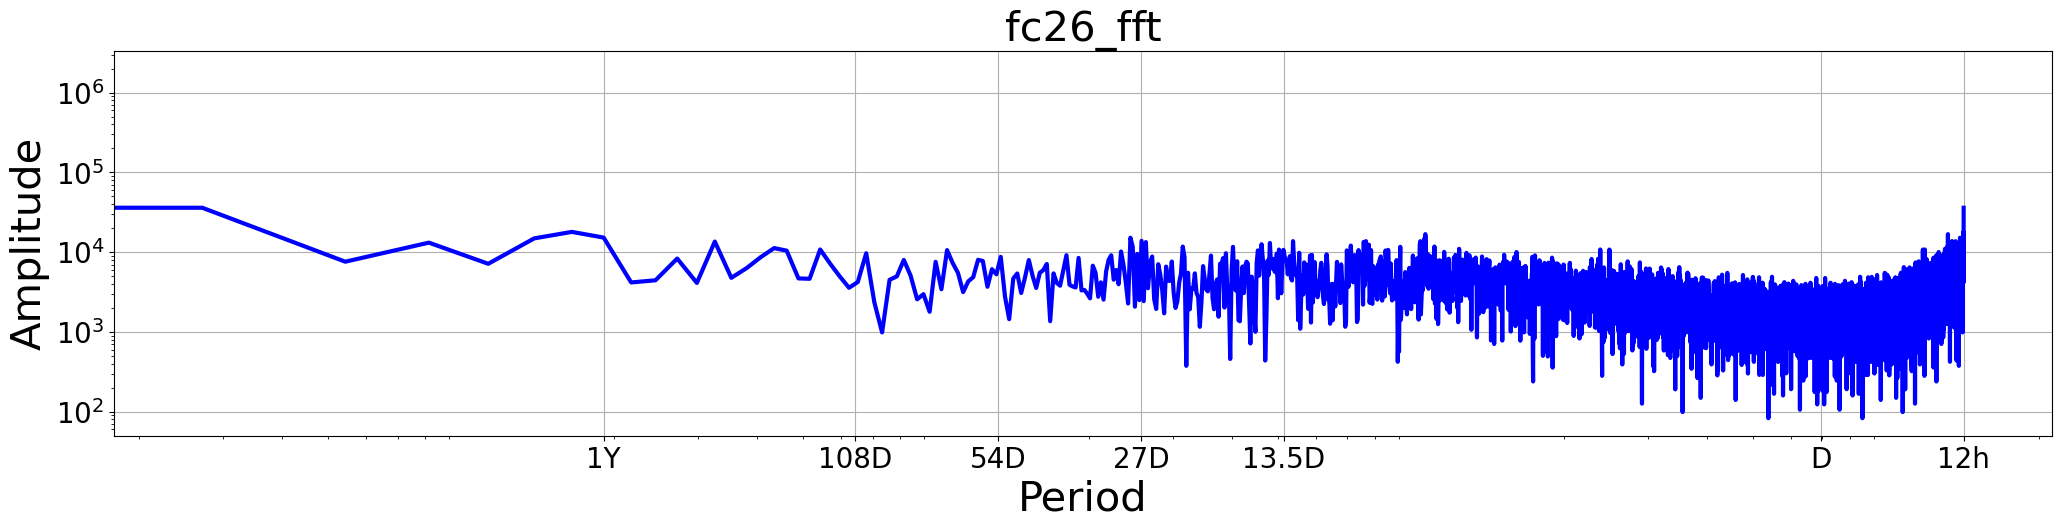

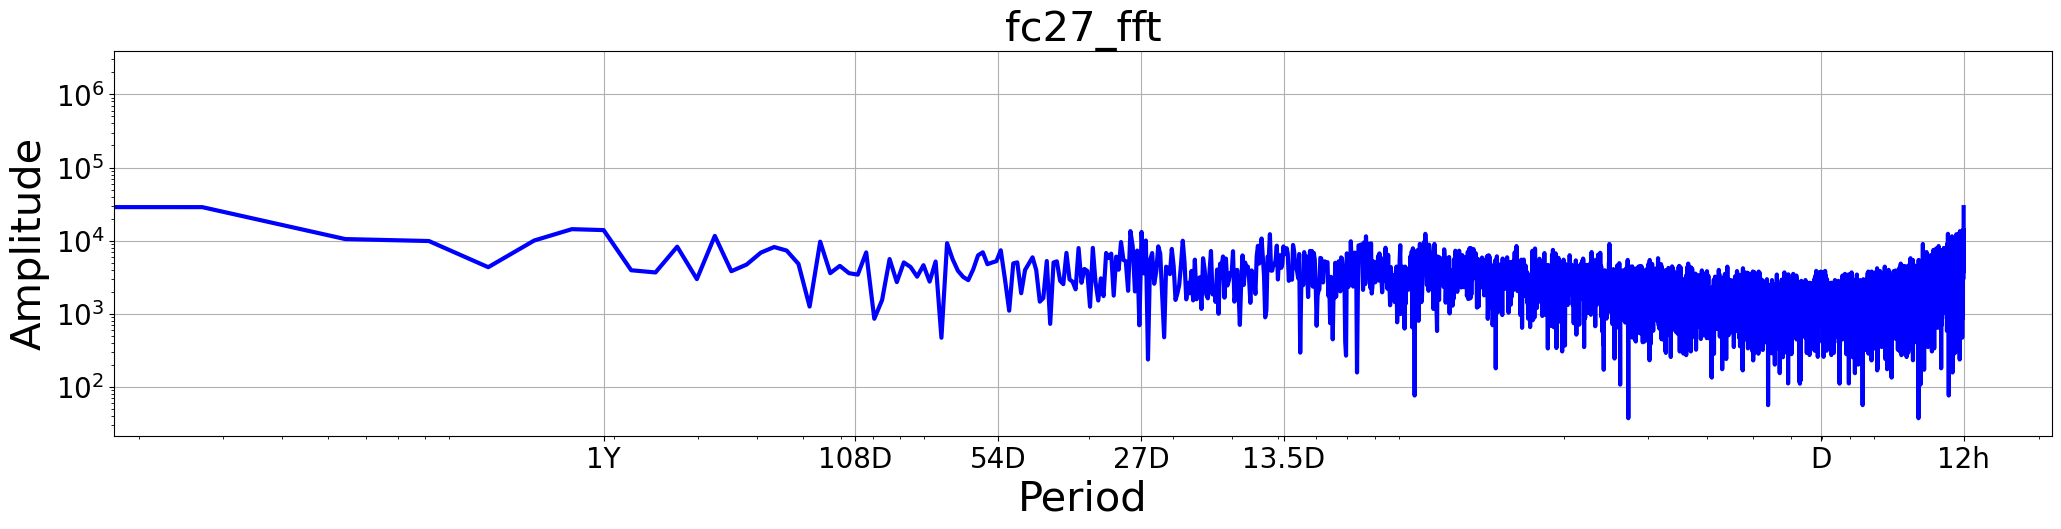

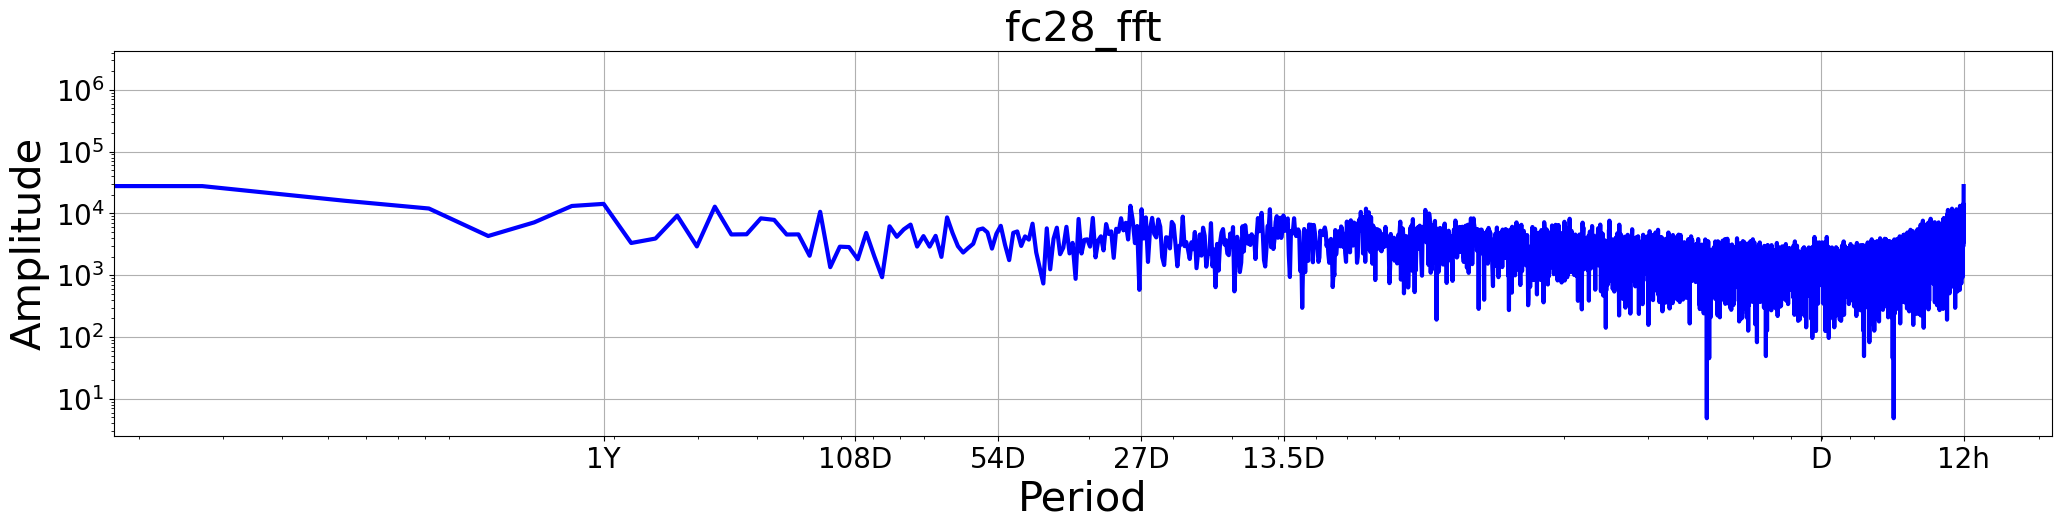

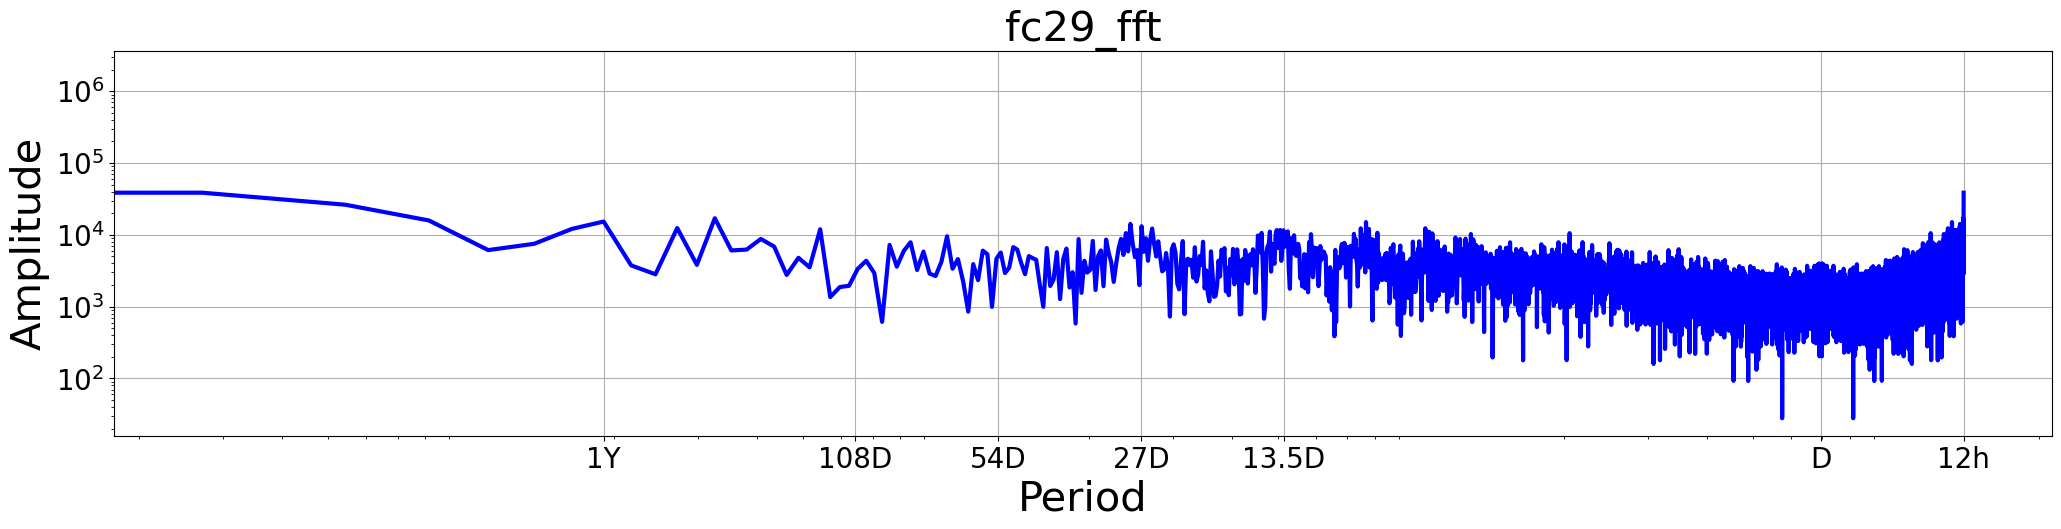

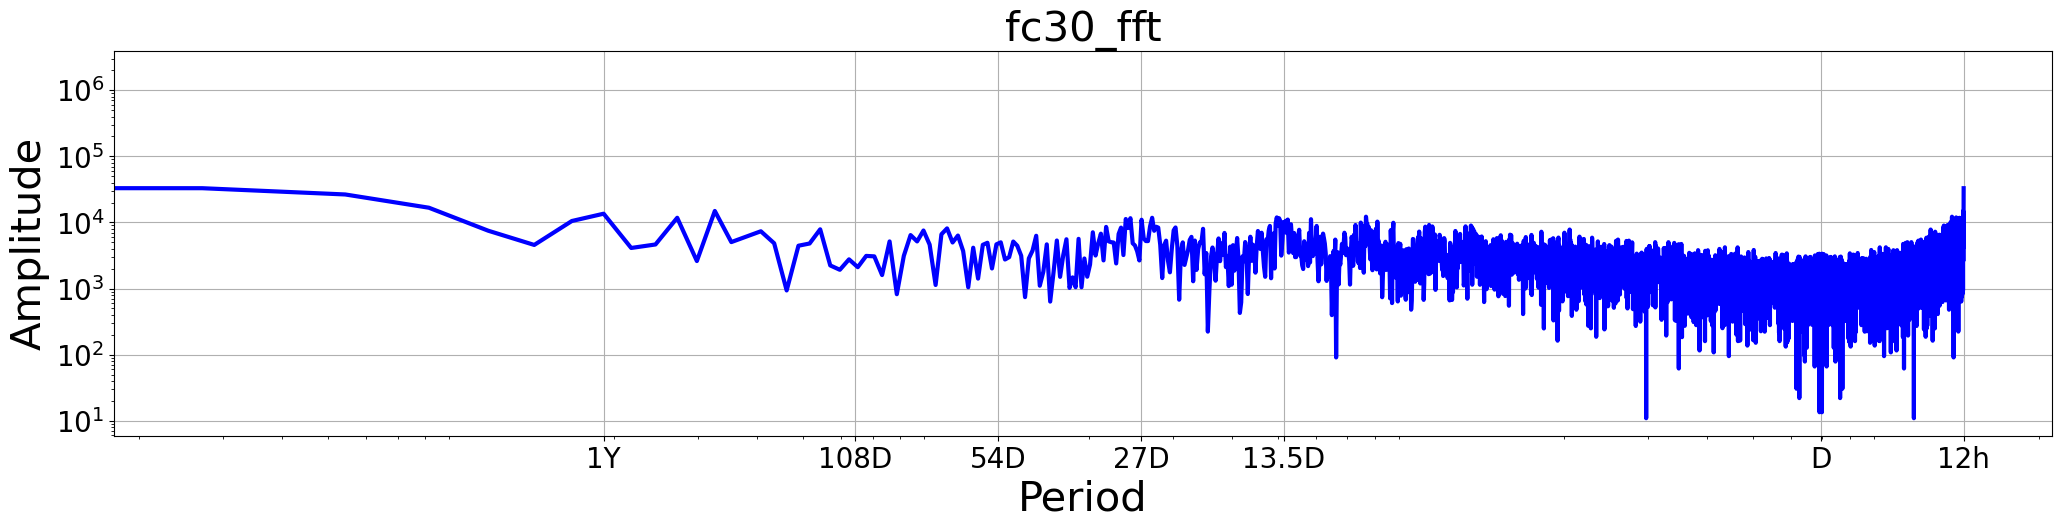

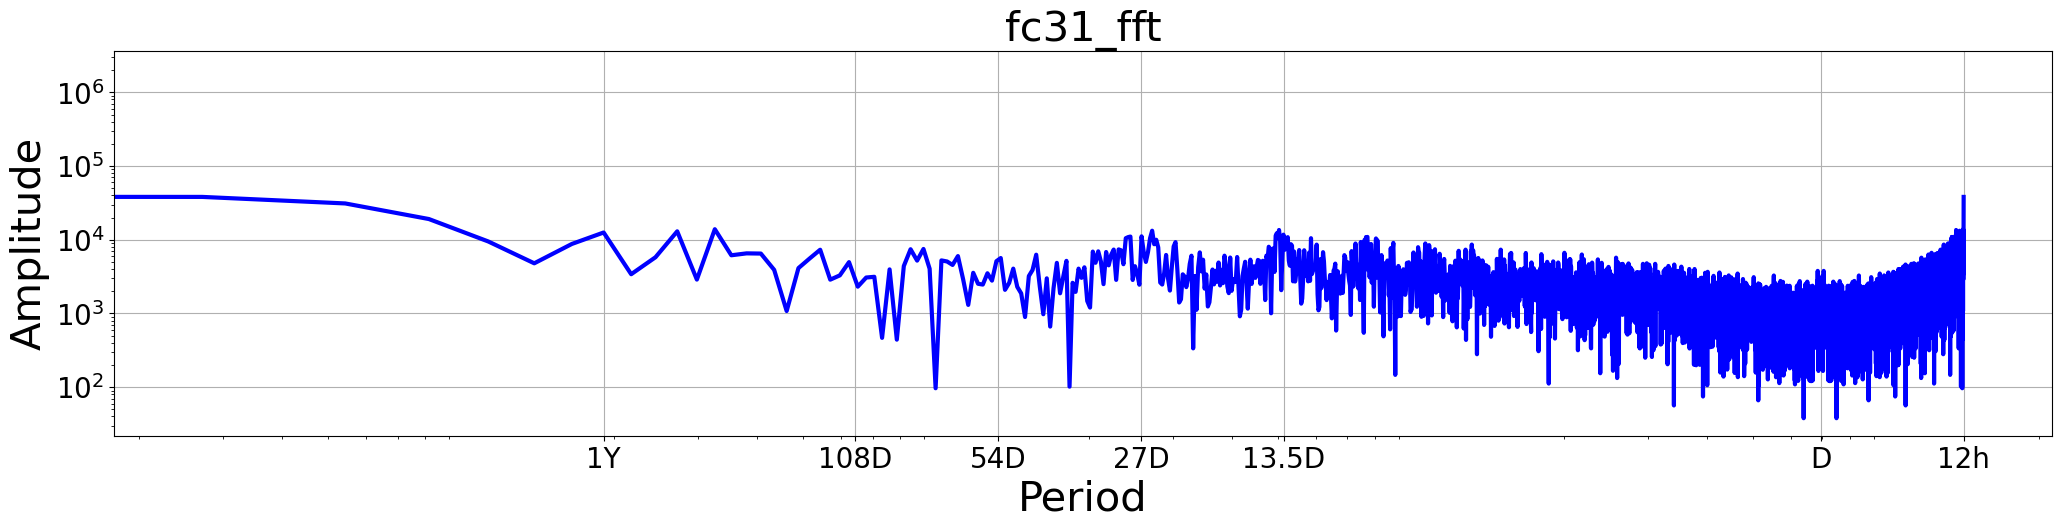

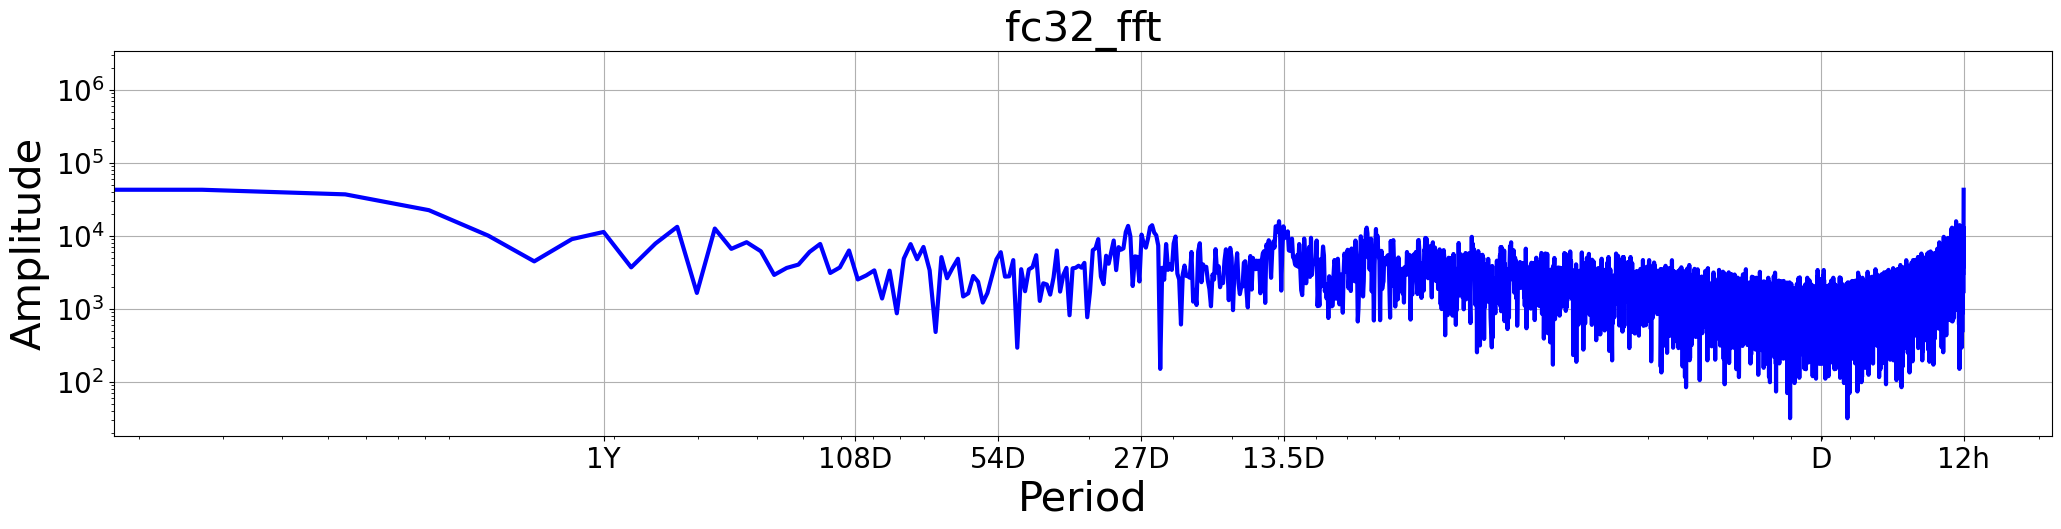

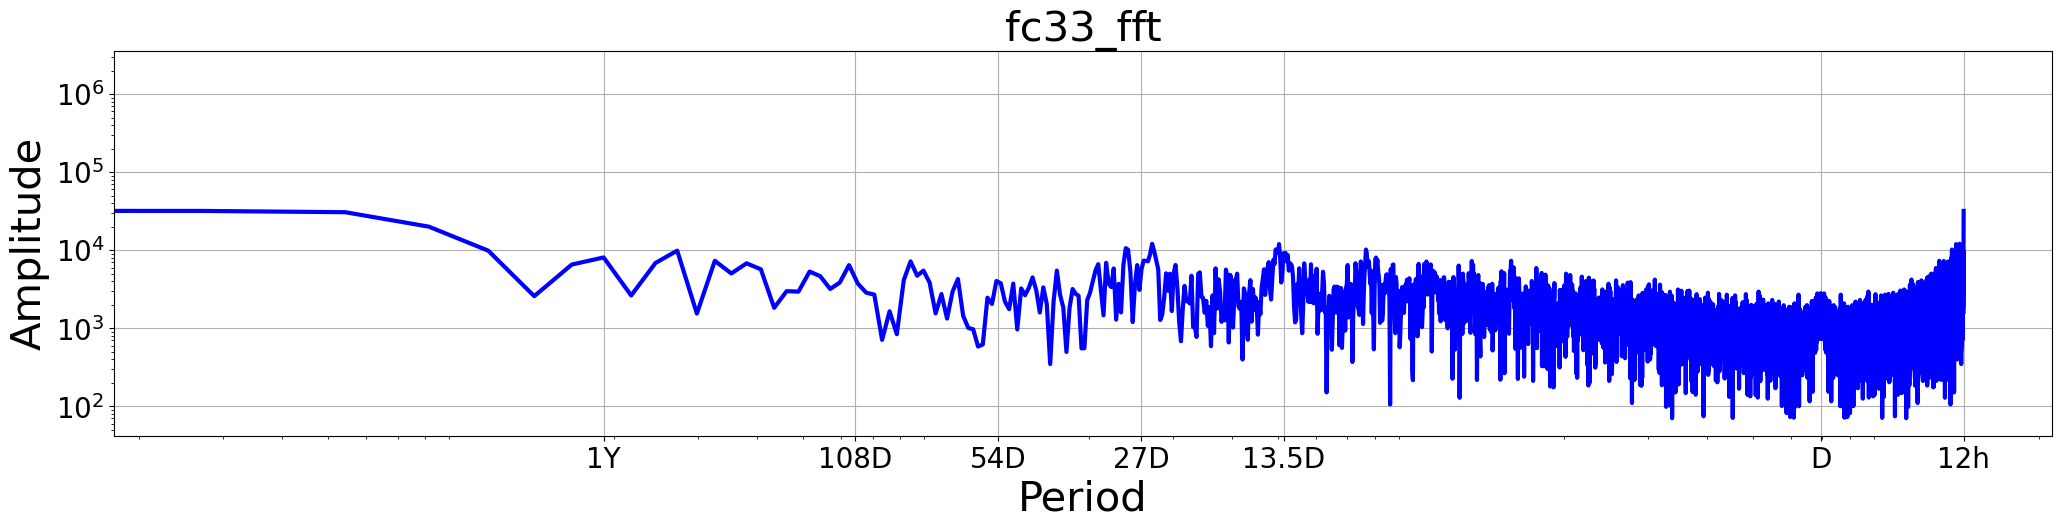

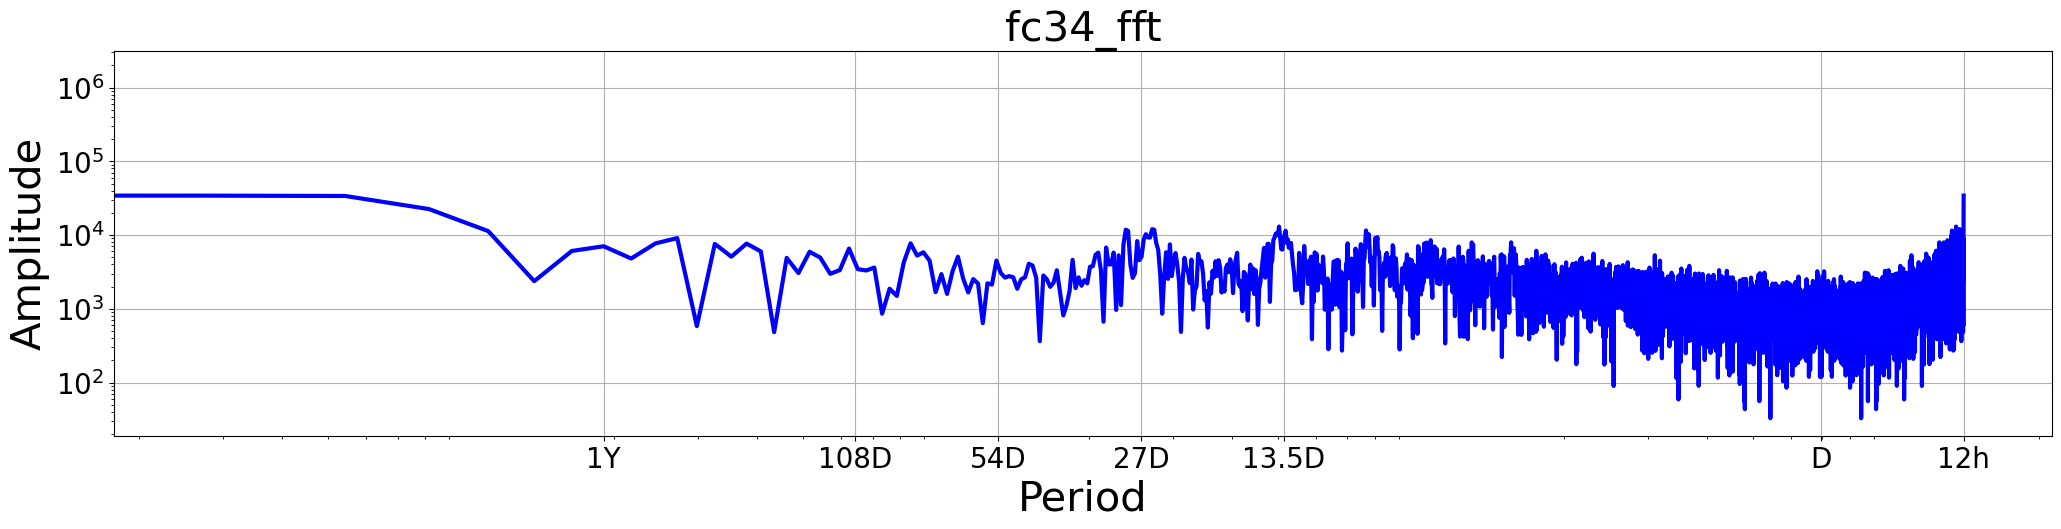

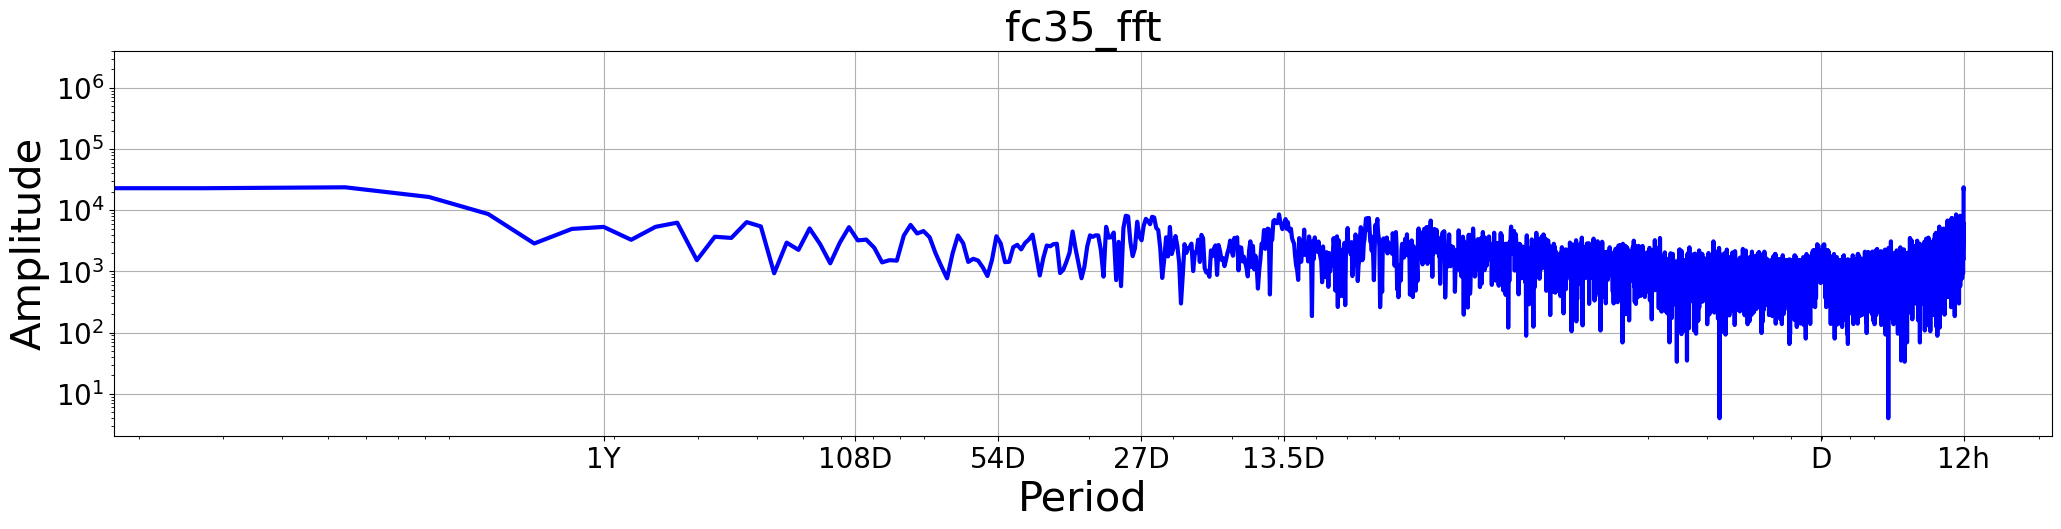

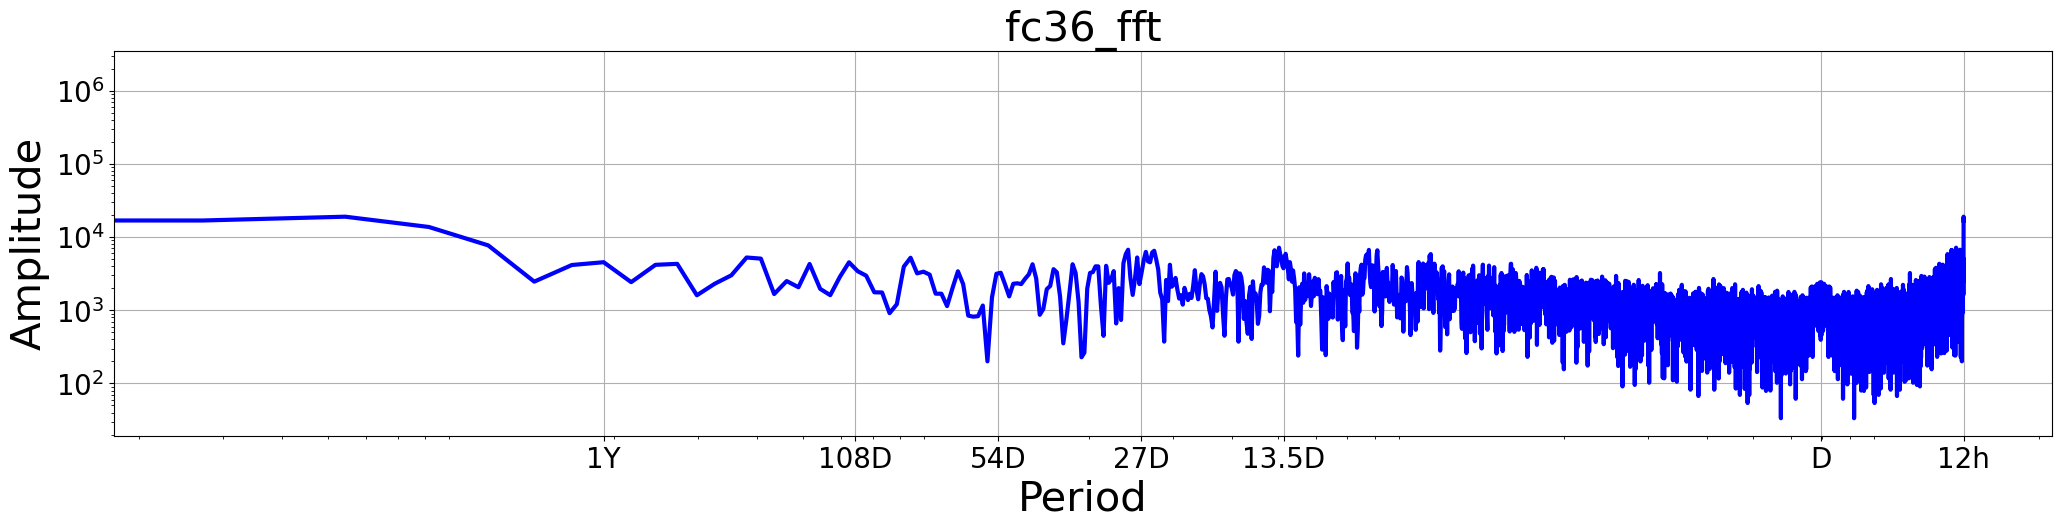

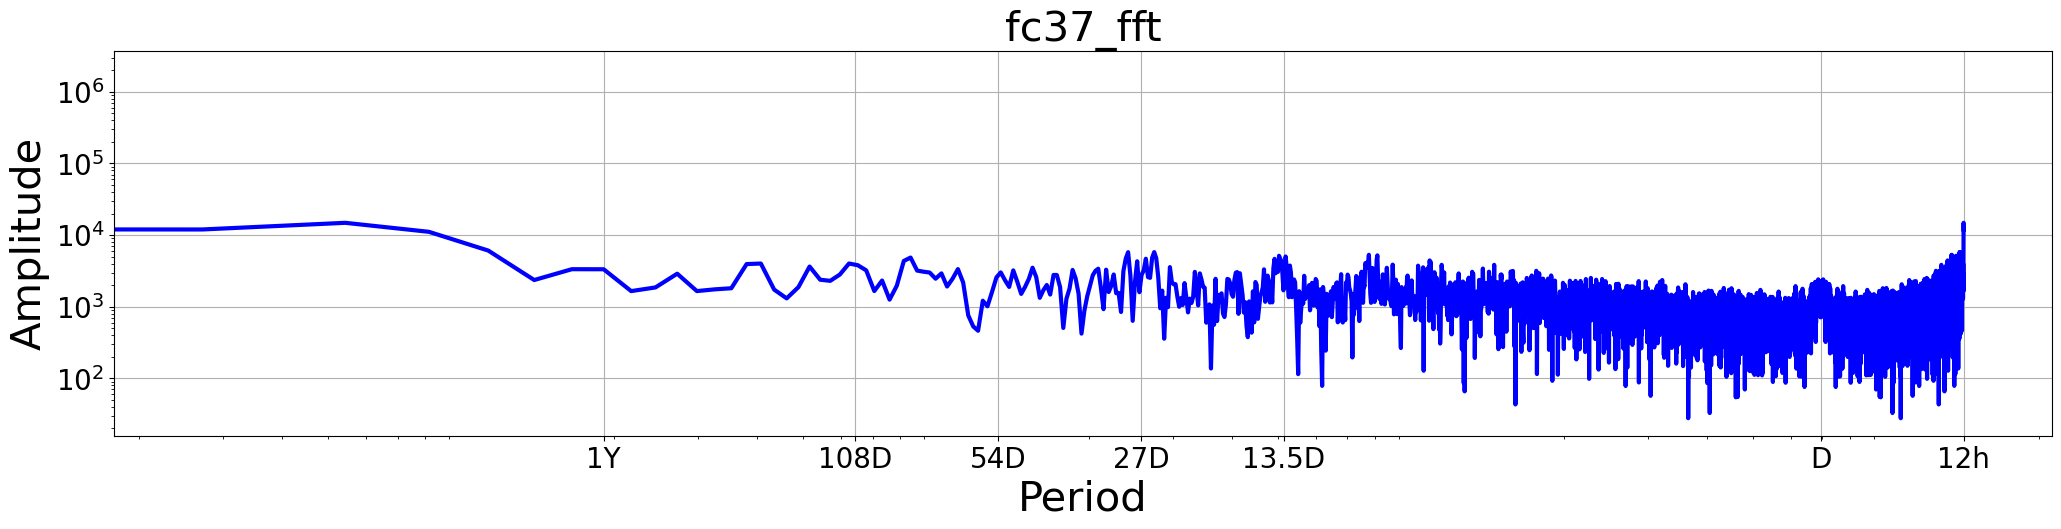

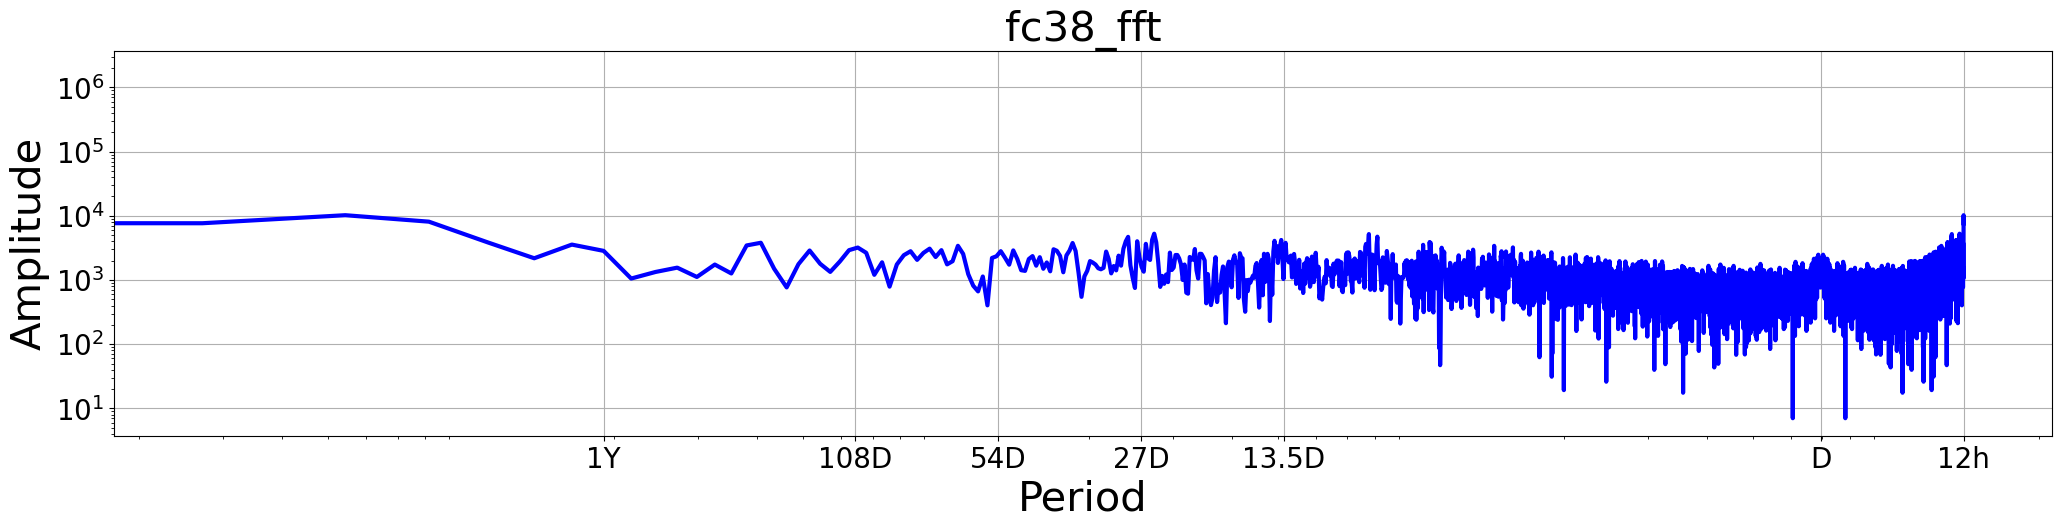

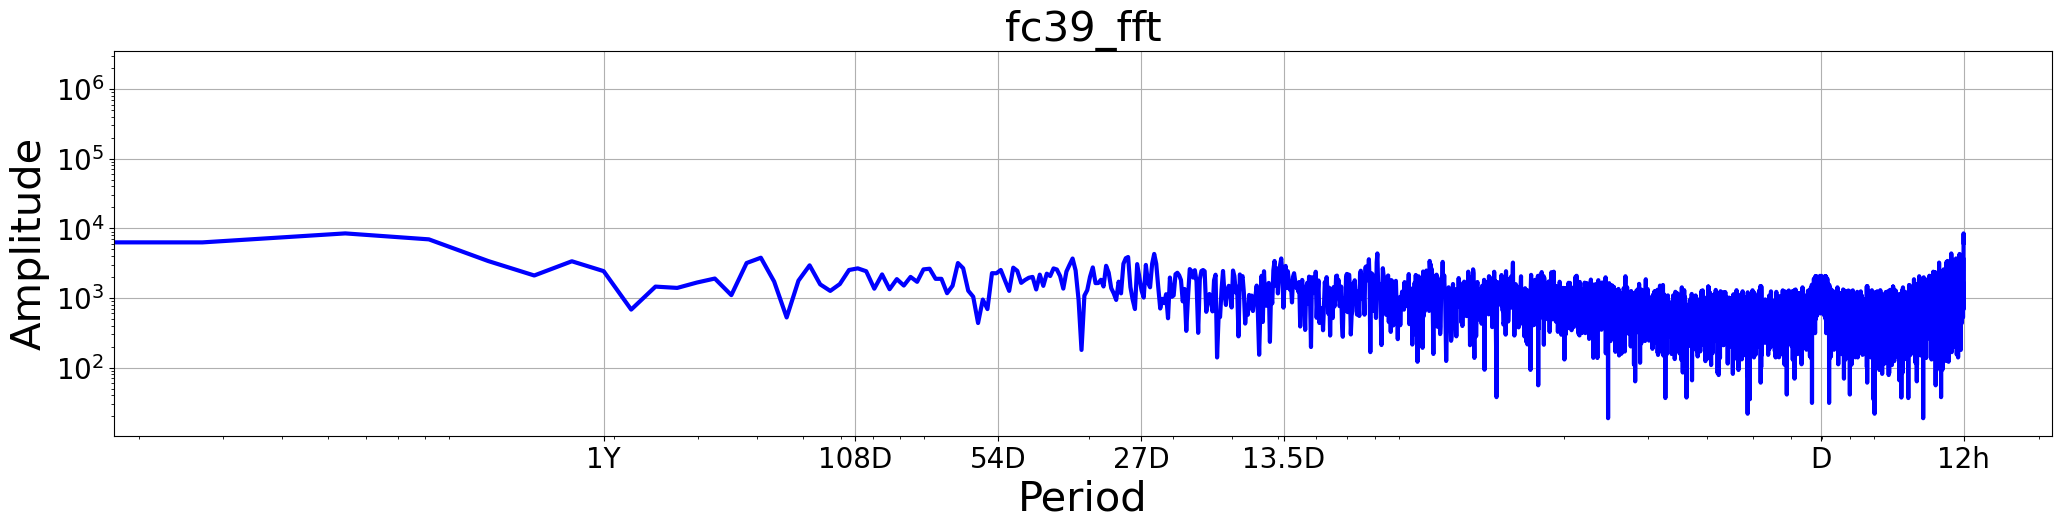

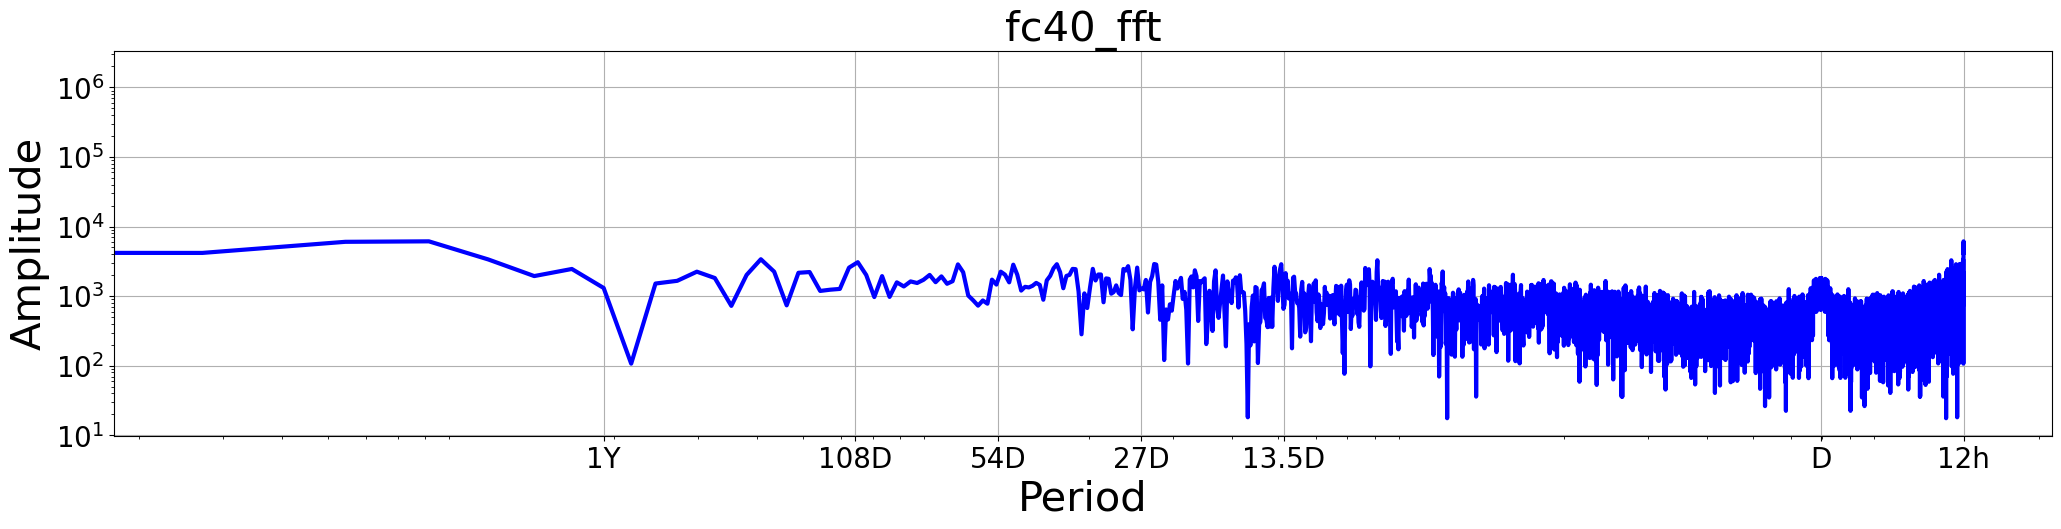

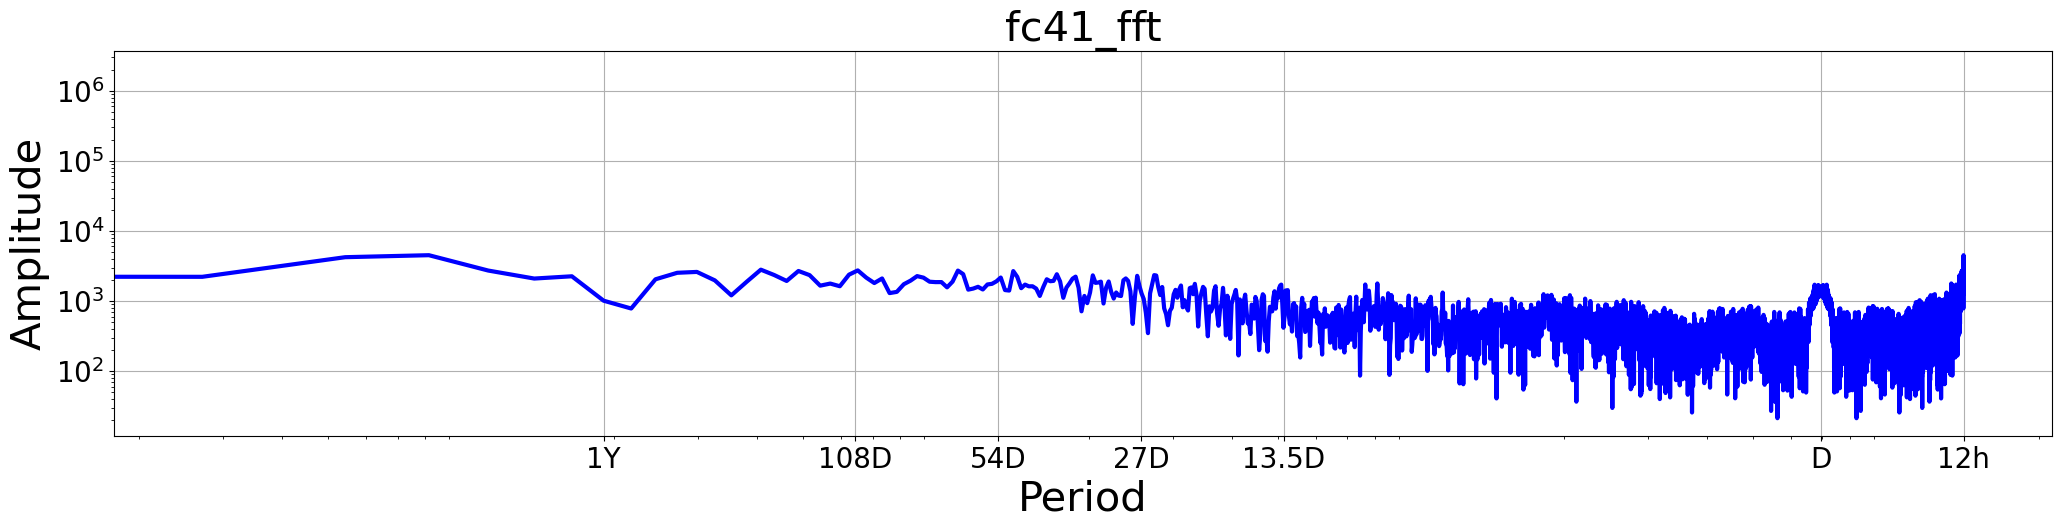

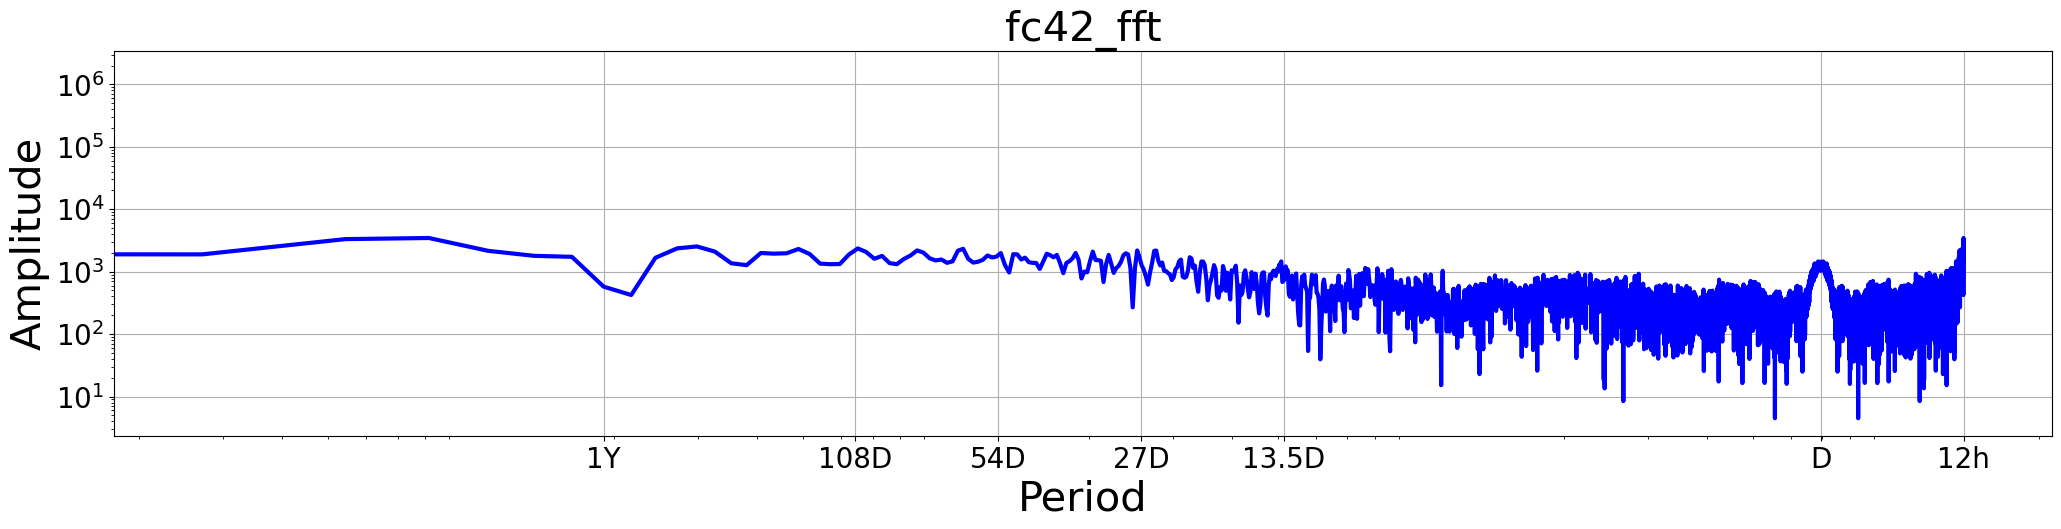

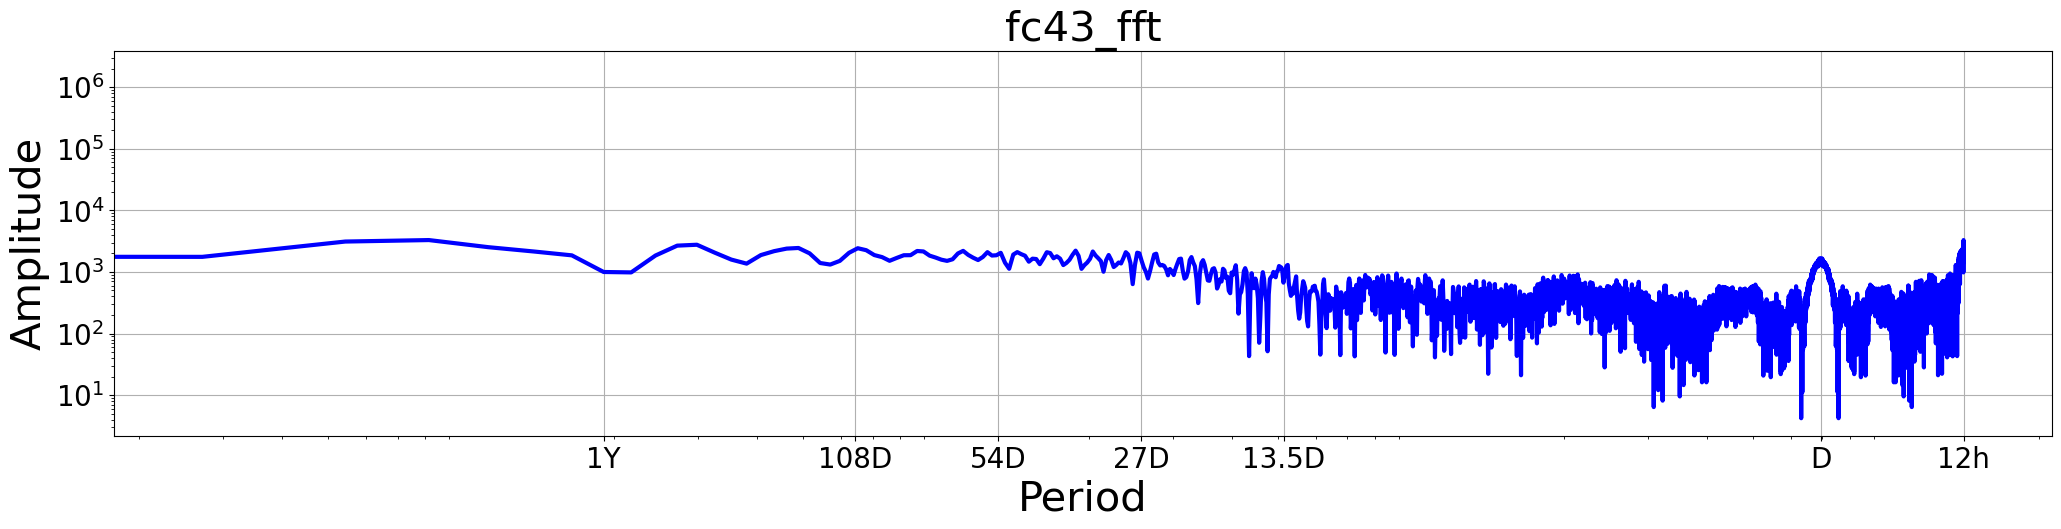

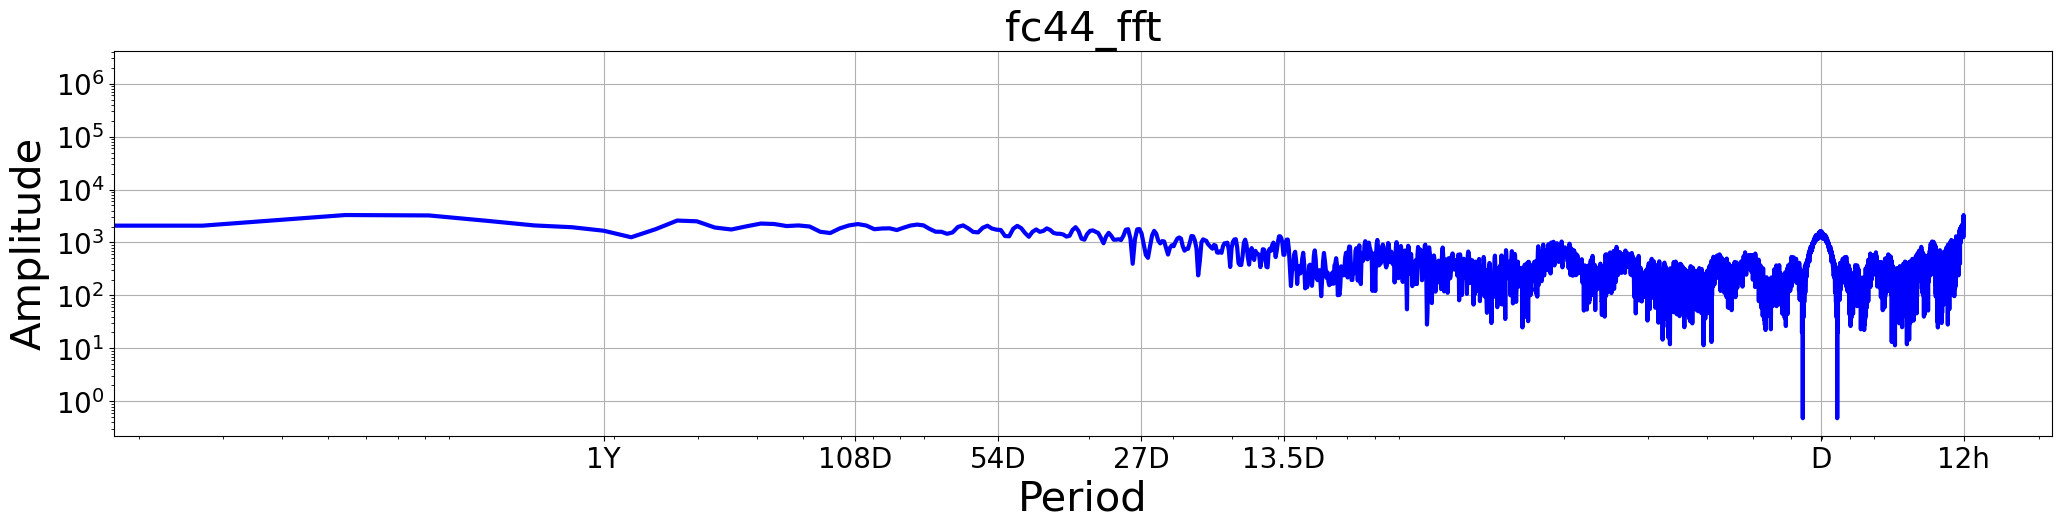

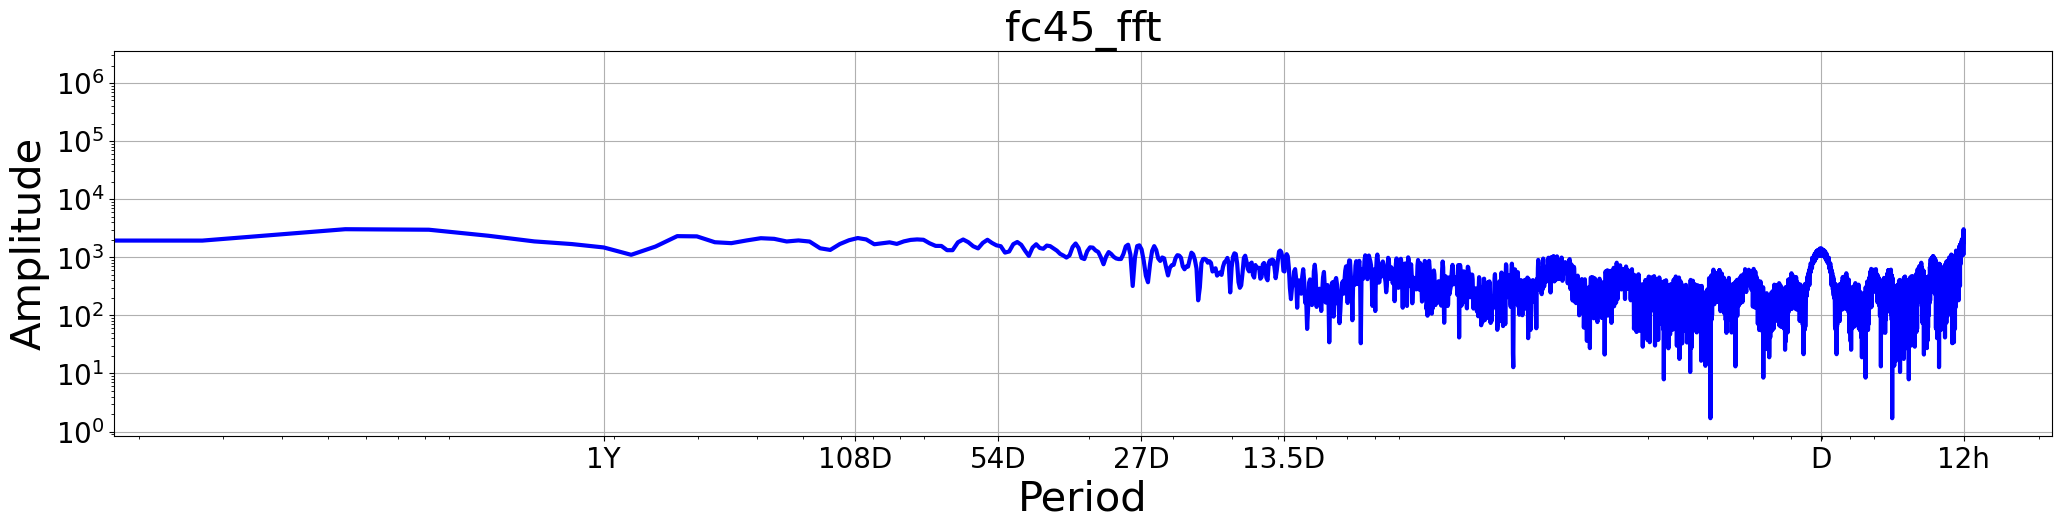

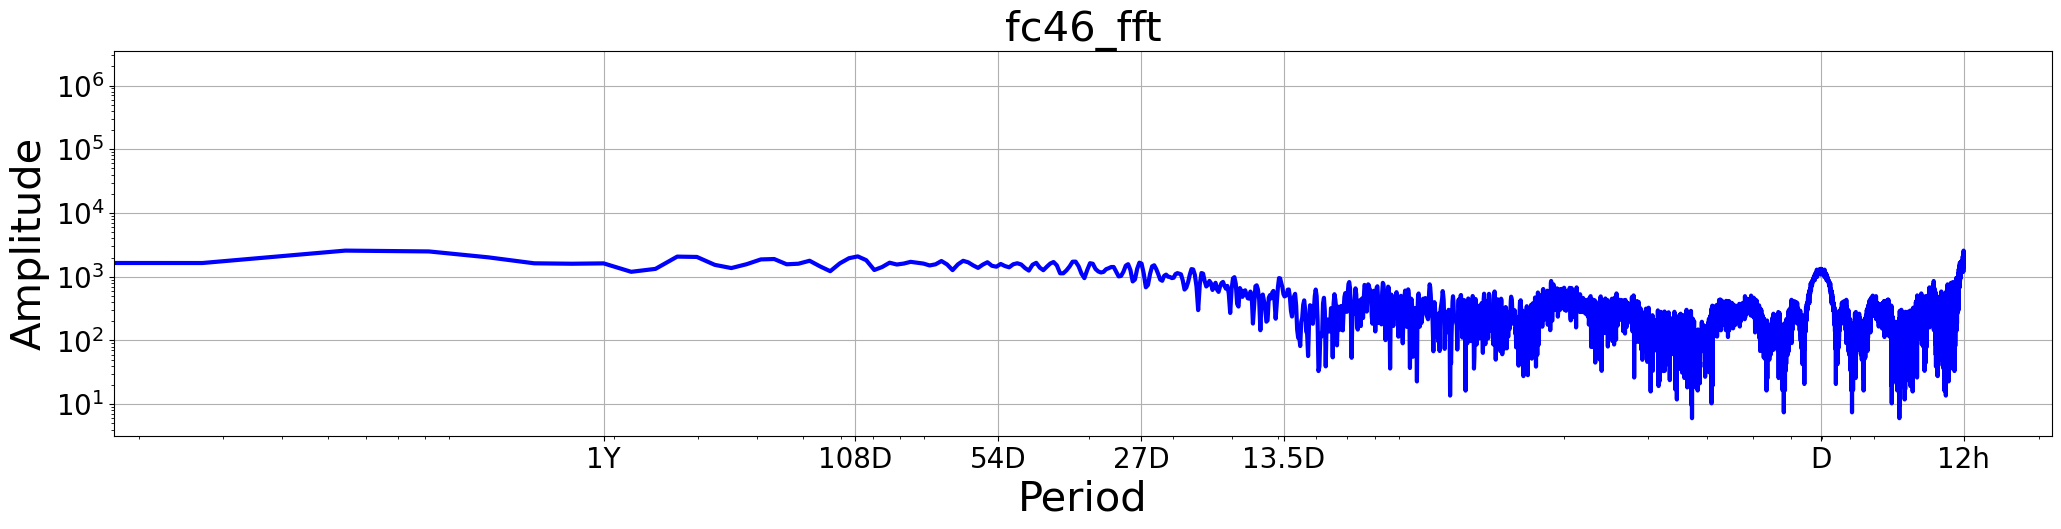

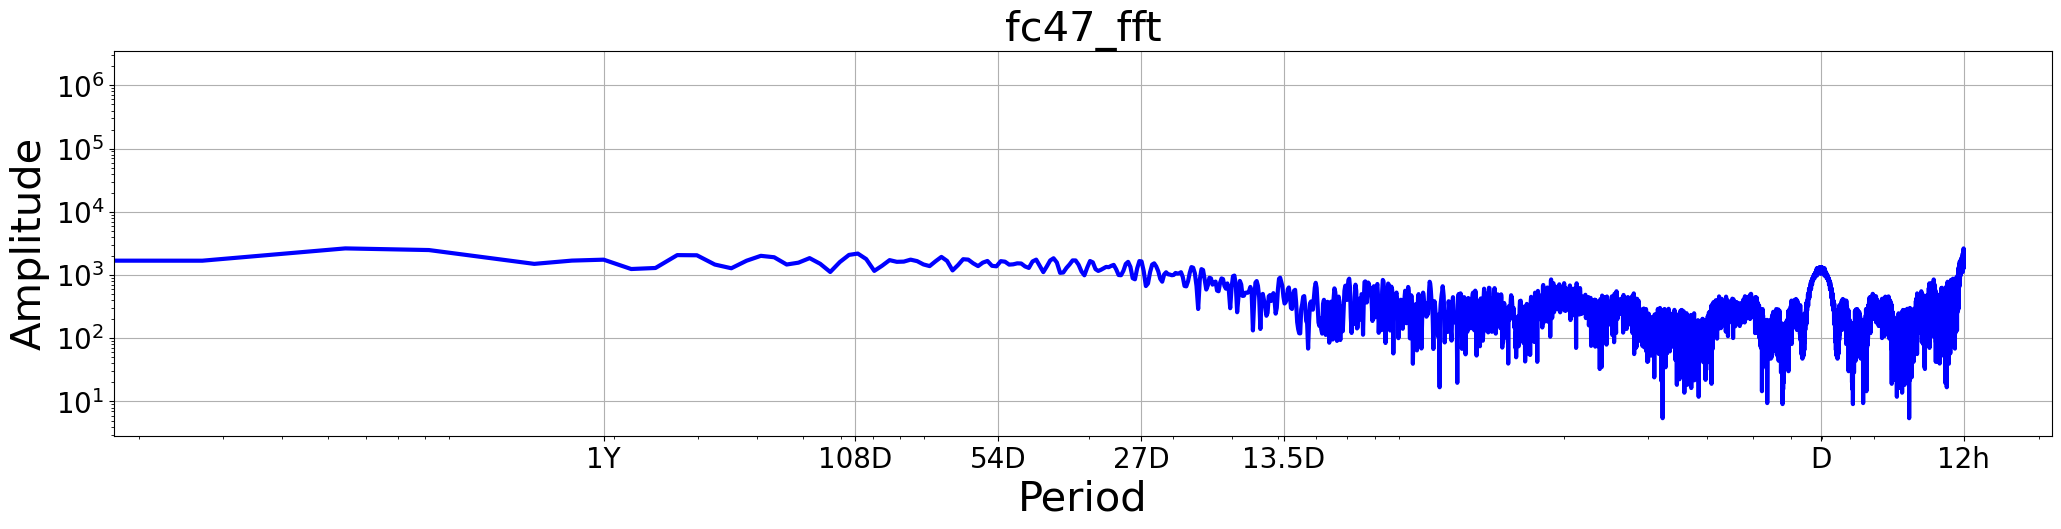

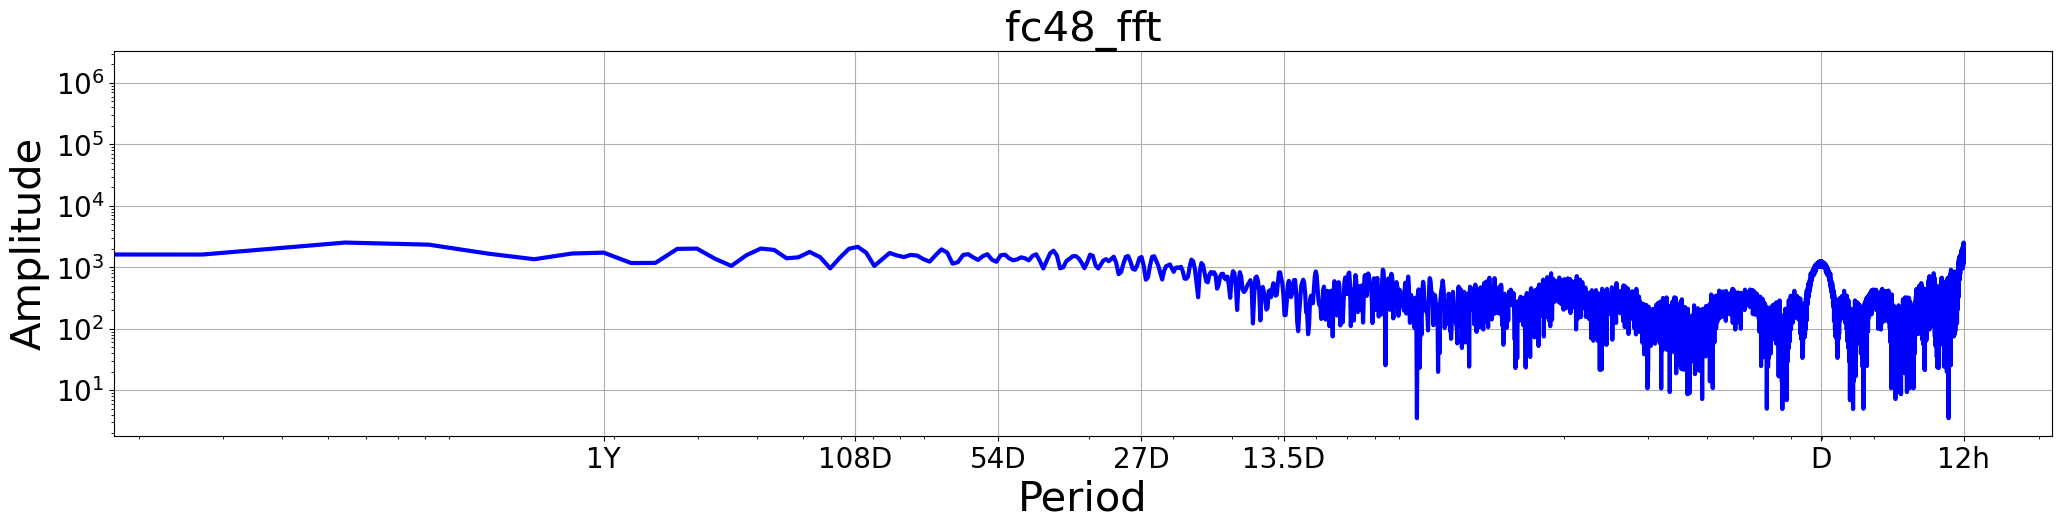

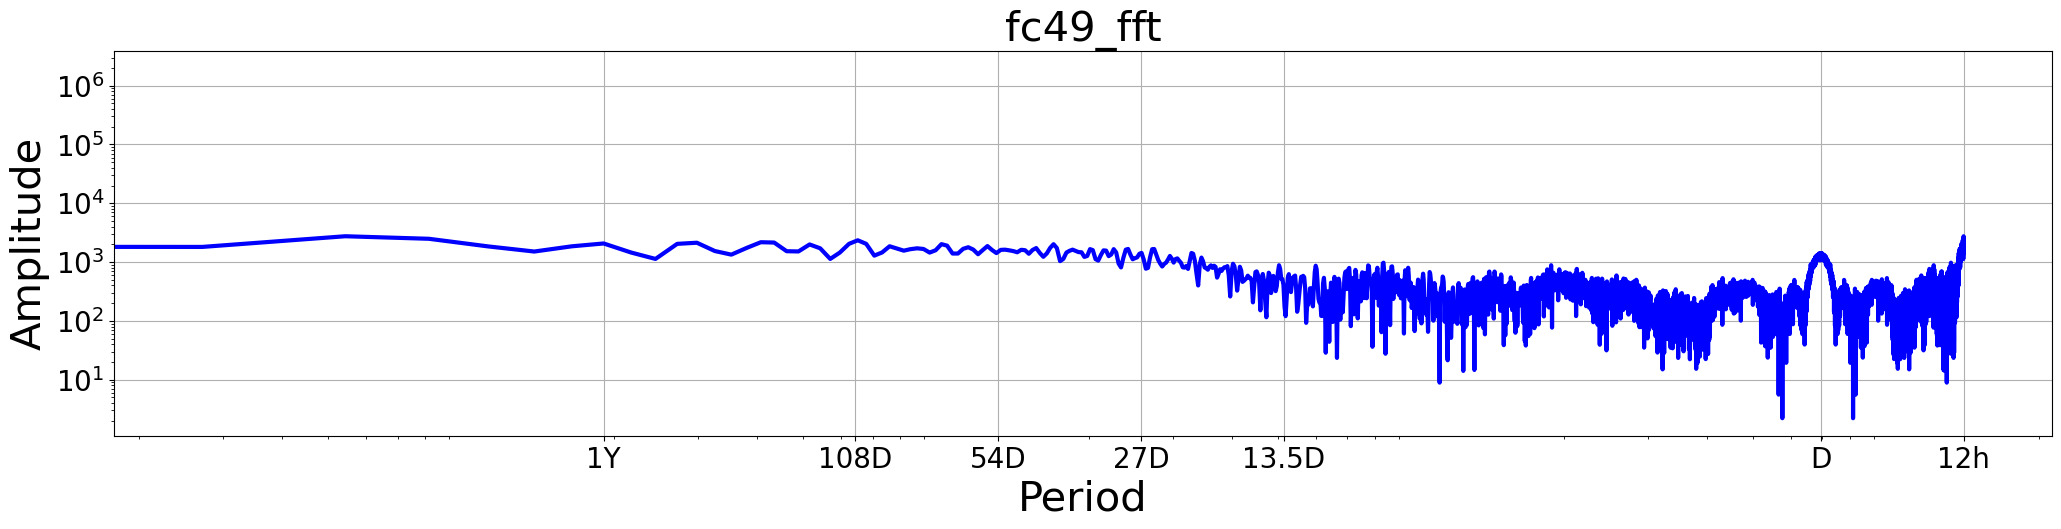

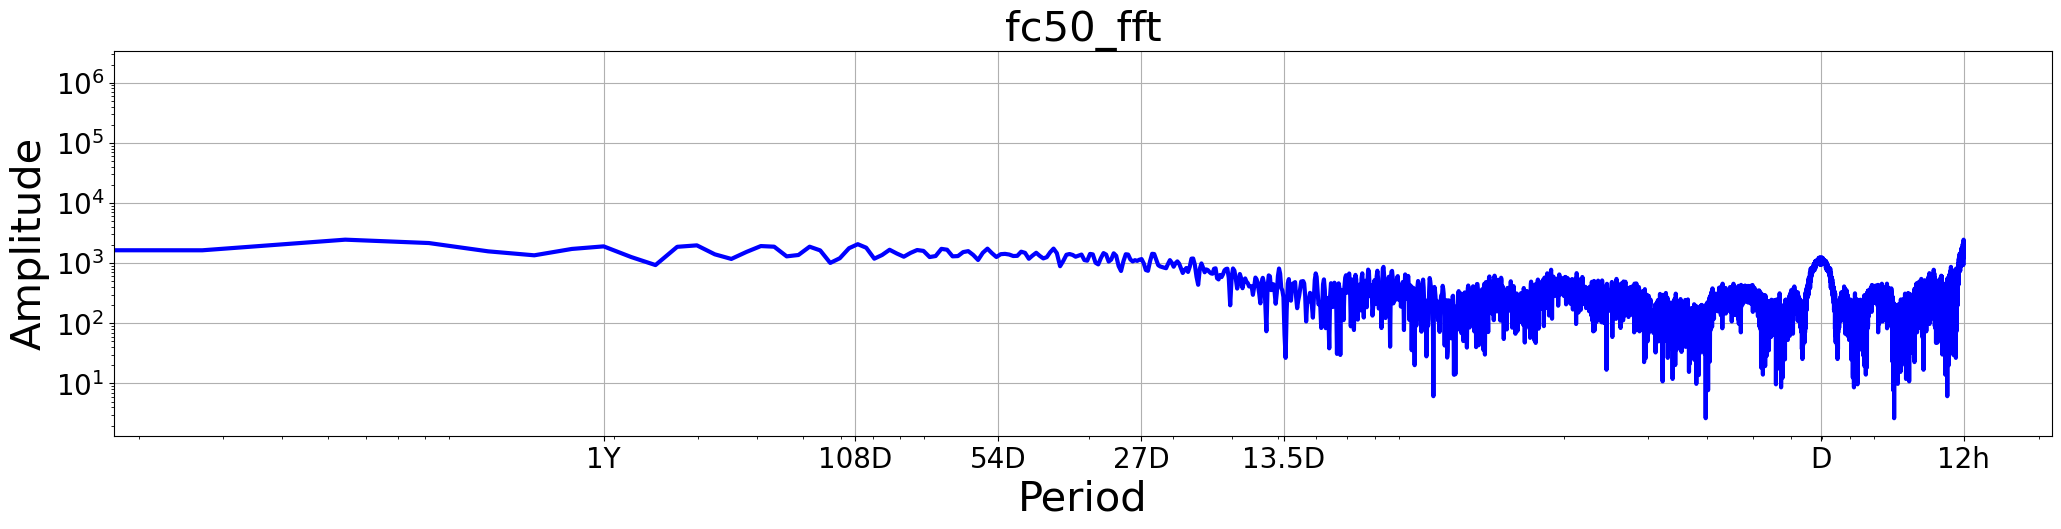

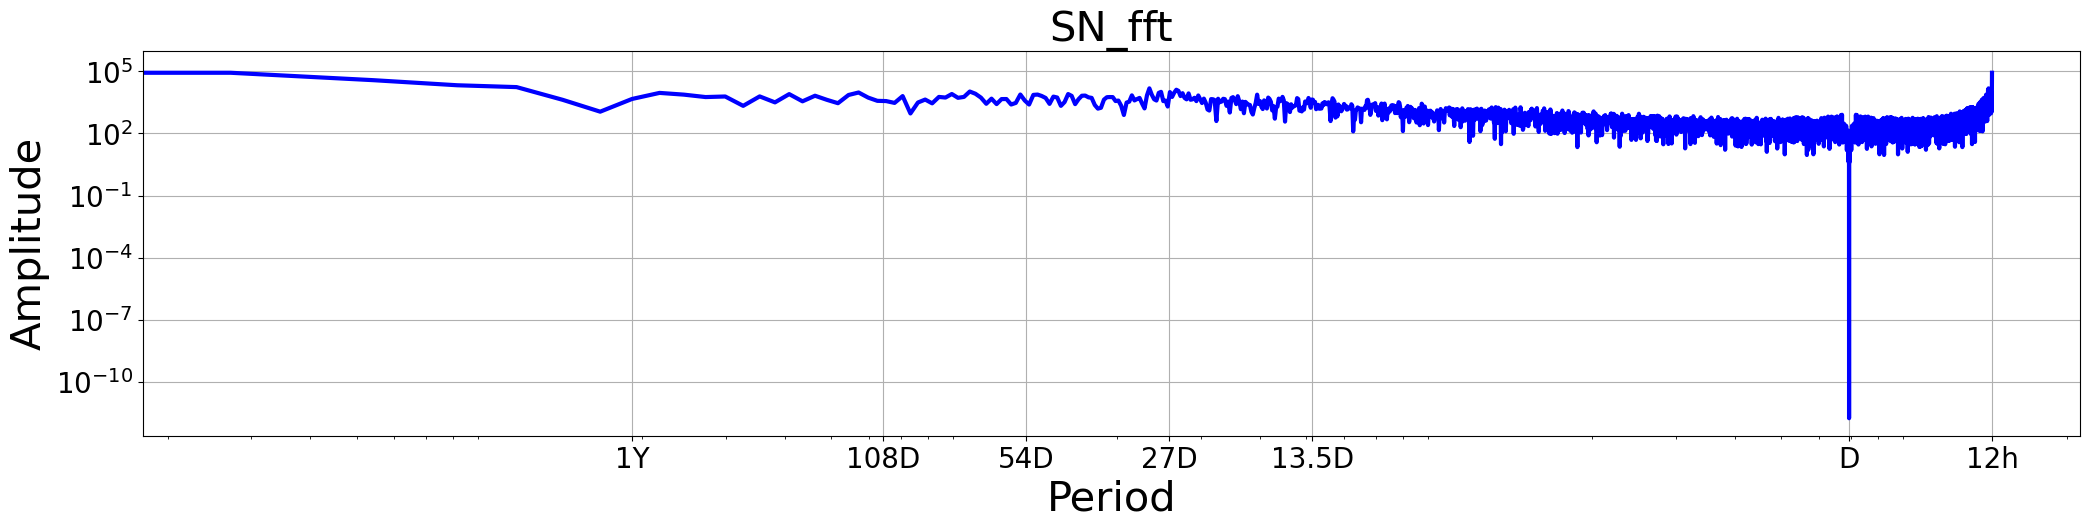

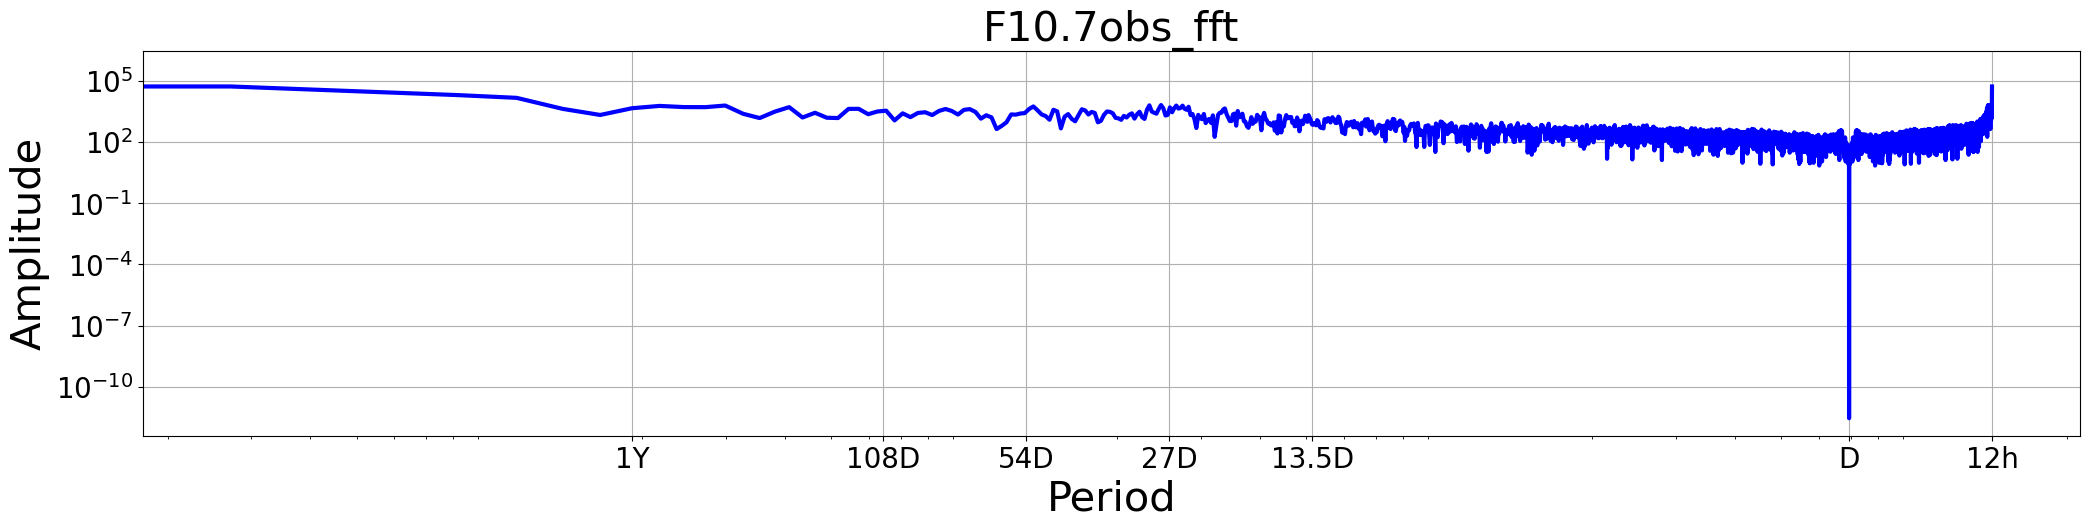

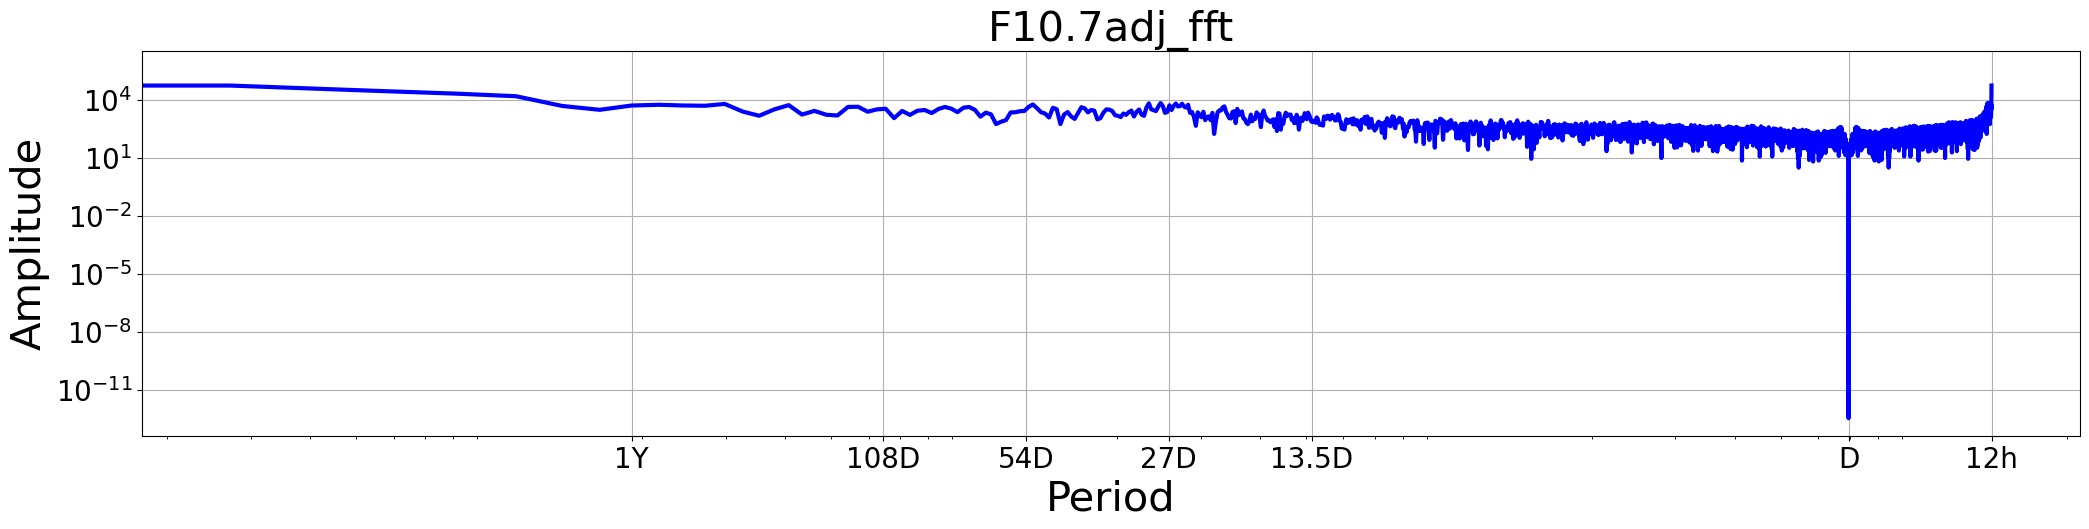

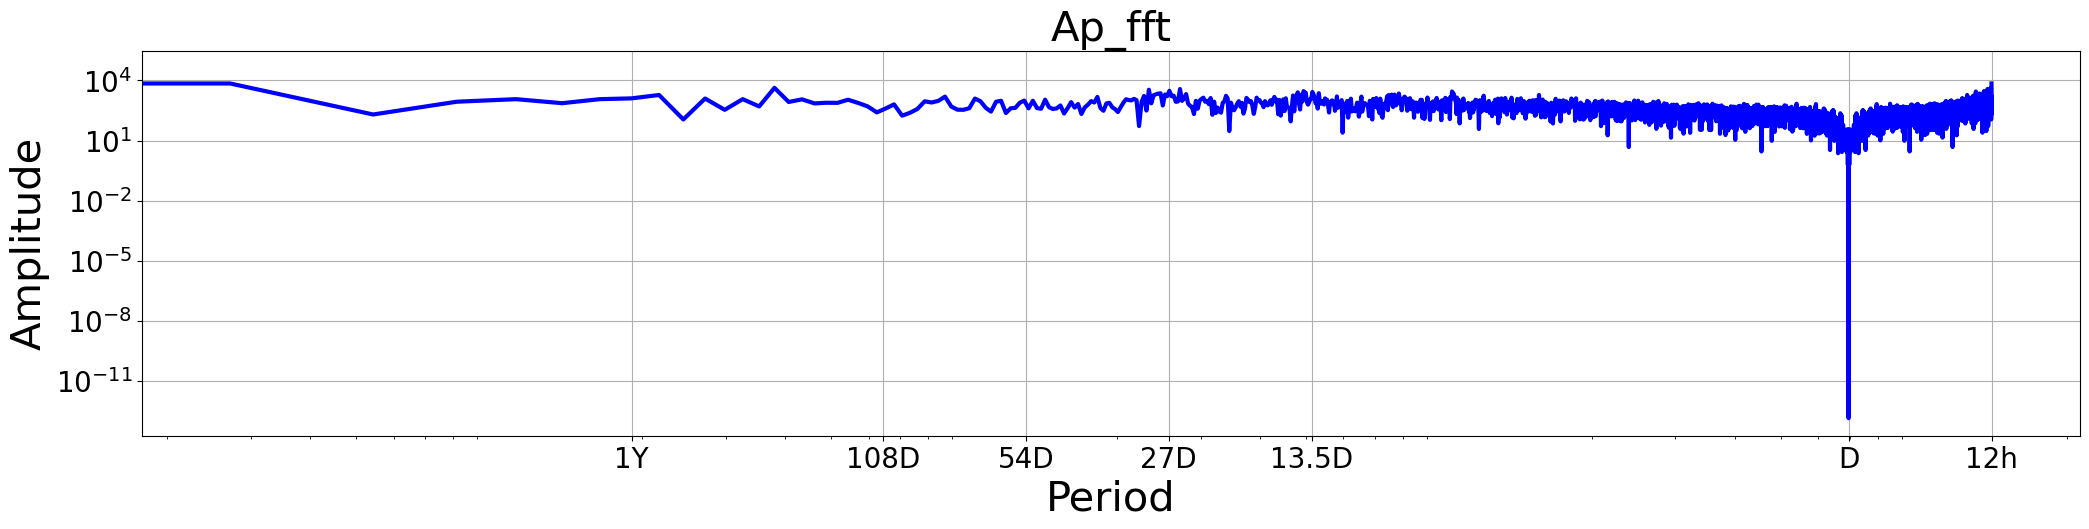

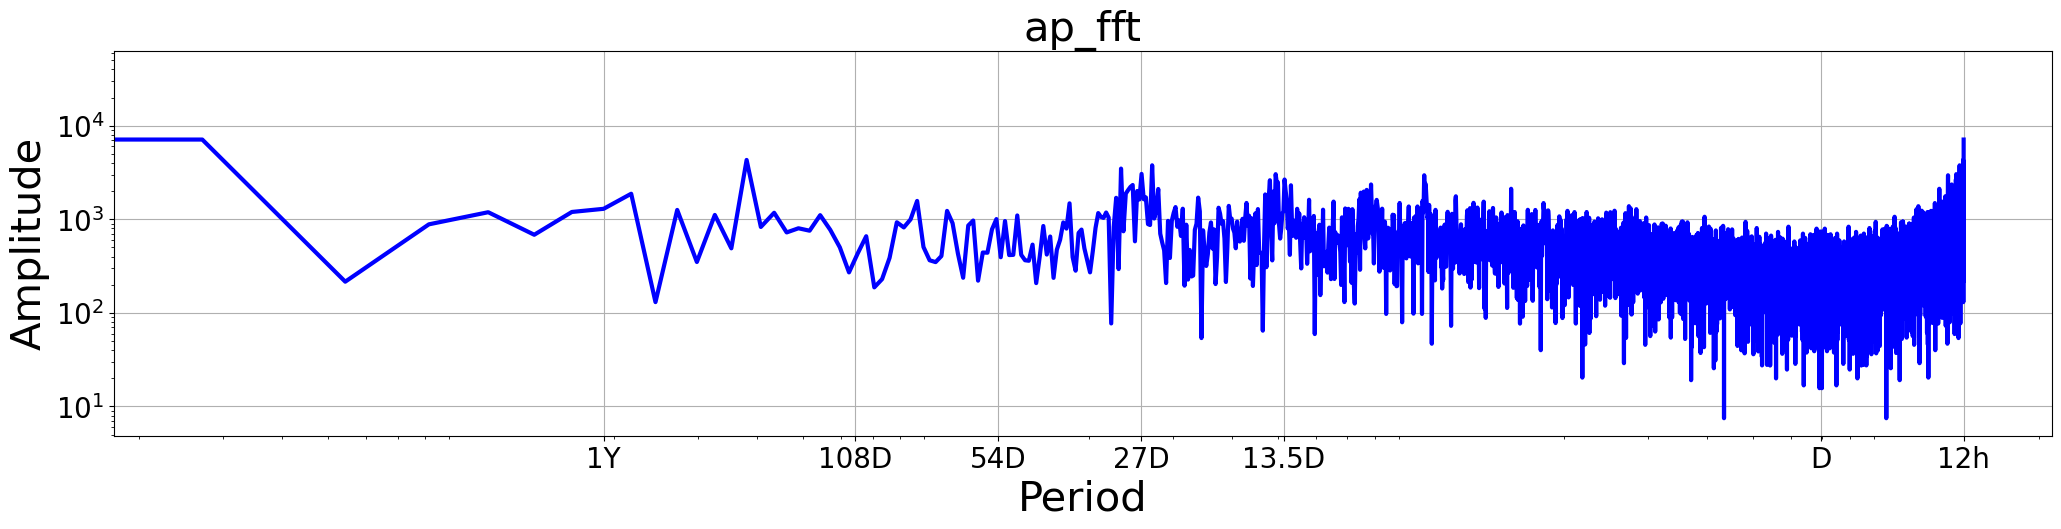

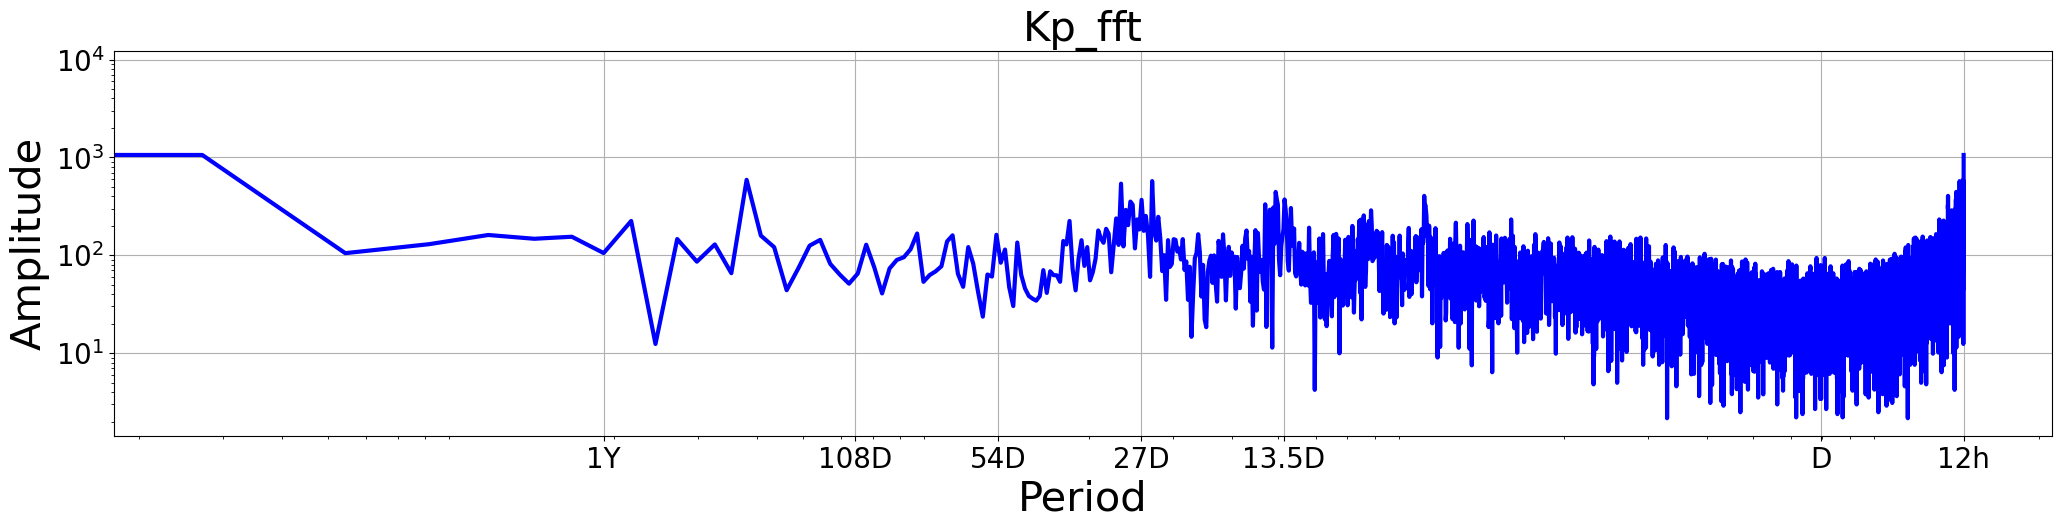

In [80]:
min_per_step = 60 * 12
mf_df = df.fillna(df.mean())
rsp_df = mf_df.resample(rule=f'{min_per_step}min').mean()

data = rsp_df.to_numpy()
fft_data = np.fft.fft(data, axis=0)
n_fft_data = len(fft_data)
freq = np.arange(0, n_fft_data)/(n_fft_data*min_per_step)

for i, amp in enumerate(fft_data.T):
    plt.figure(figsize=(25, 5))
    plt.plot(freq, np.abs(amp), 'b-', lw=3)
    plt.grid()
    plt.xscale('log')
    plt.yscale('log')
    plt.title(df.columns[i] + '_fft', fontsize=30)
    plt.xlabel('Period', fontsize=30)
    plt.ylabel('Amplitude', fontsize=30)
    plt.xticks(
        ticks=[1/(60*12), 1/(60*24), 2/(60*24*27), 1/(60*24*27), 1/(60*24*54), 1/(60*24*108), 1/(60*24*365.2524)],
        labels=['12h', 'D', '13.5D', '27D', '54D', '108D', '1Y'],
        fontsize=20
    )
    plt.yticks(fontsize=20)
    plt.show()